## Initial Setup and Data Loading

### Aggregating the NFHS Data Children Outcomes on a District Level

In [182]:
import pandas as pd
import numpy as np

In [ ]:
covariates_of_interest = ['v005', # sample weight
                        'v006', # month of interview
                          'v007', # year of interview
                          'v024', # state
                          'v025', # urban/rural
                          'sdist', # district
                          'v130', # religion
                          's116', # caste
                          'sphase'] # survey phase

outcomes_of_interest = ['hw70', # Height/Age standard deviation
                         'hw71', # Weight/Age standard deviation
                         'hw72' # Weight/Height standard deviation
                         ]

In [ ]:
## THIS BLOCK OF CODE IS FOR READING IN THE DATA IN CHUNKS AND WRITING TO CSV

import pandas as pd

input_path = "C:/Users/dhana/Desktop/Acads/Stanford/STATS209/Final Project/NHS Data/2019-21/IAKR7EDT/IAKR7EFL.DTA"
# input_path = "C:/Users/dhana/Desktop/Acads/Stanford/STATS209/Final Project/NHS Data/2015-16/IAKR74DT/IAKR74FL.DTA"
output_file = "children_selected_2.csv"

# Define columns to keep
cols_to_keep = covariates_of_interest + outcomes_of_interest
 
# Read in chunks
chunksize = 50000  # adjust if needed based on RAM

# Loop over chunks and write to CSV
for i, chunk in enumerate(pd.read_stata(input_path, chunksize=chunksize, columns=cols_to_keep, convert_categoricals=False)):
    # For first chunk, write header; for others, append without header
    chunk.to_csv(output_file, mode='a', index=False, header=(i==0))
    print(f"Processed chunk {i+1}")

Processed chunk 1
Processed chunk 2
Processed chunk 3
Processed chunk 4
Processed chunk 5


In [185]:
data = pd.read_csv("children_selected_2.csv")
data.head(10)

,v005,v006,v007,v024,v025,sdist,v130,s116,sphase,hw70,hw71,hw72
0,193444,9,2019,1,2,1,2,4.0,1,526.0,-207.0,9996.0
1,193444,9,2019,1,2,1,2,4.0,1,565.0,150.0,-139.0
2,193444,9,2019,1,2,1,2,4.0,1,461.0,153.0,-116.0
3,193444,9,2019,1,2,1,2,4.0,1,498.0,-224.0,9998.0
4,193444,9,2019,1,2,1,2,4.0,1,298.0,-131.0,-432.0
5,201224,12,2019,1,2,1,2,4.0,1,13.0,272.0,393.0
6,201224,12,2019,1,2,1,2,4.0,1,9998.0,9998.0,-25.0
7,201224,12,2019,1,2,1,2,4.0,1,51.0,304.0,350.0
8,201224,12,2019,1,2,1,2,4.0,1,9998.0,9998.0,383.0
9,211589,9,2019,1,2,1,2,3.0,1,NaN,NaN,NaN


In [ ]:
# This block of code removes missing values from the outcome variables

invalid = [9996, 9997, 9998, 9999]

cols = ['hw70', 'hw71', 'hw72']

# Drop rows where any of these columns contains an invalid code
data_clean = data[~data[cols].isin(invalid).any(axis=1)]
df = data_clean.dropna()
print(f'{len(data_clean) - len(df)} rows dropped. Remaining rows: {len(df)}')

27734 rows dropped. Remaining rows: 189577


In [187]:
import matplotlib.pyplot as plt

In [188]:
df.head()

,v005,v006,v007,v024,v025,sdist,v130,s116,sphase,hw70,hw71,hw72
1,193444,9,2019,1,2,1,2,4.0,1,565.0,150.0,-139.0
2,193444,9,2019,1,2,1,2,4.0,1,461.0,153.0,-116.0
4,193444,9,2019,1,2,1,2,4.0,1,298.0,-131.0,-432.0
5,201224,12,2019,1,2,1,2,4.0,1,13.0,272.0,393.0
7,201224,12,2019,1,2,1,2,4.0,1,51.0,304.0,350.0


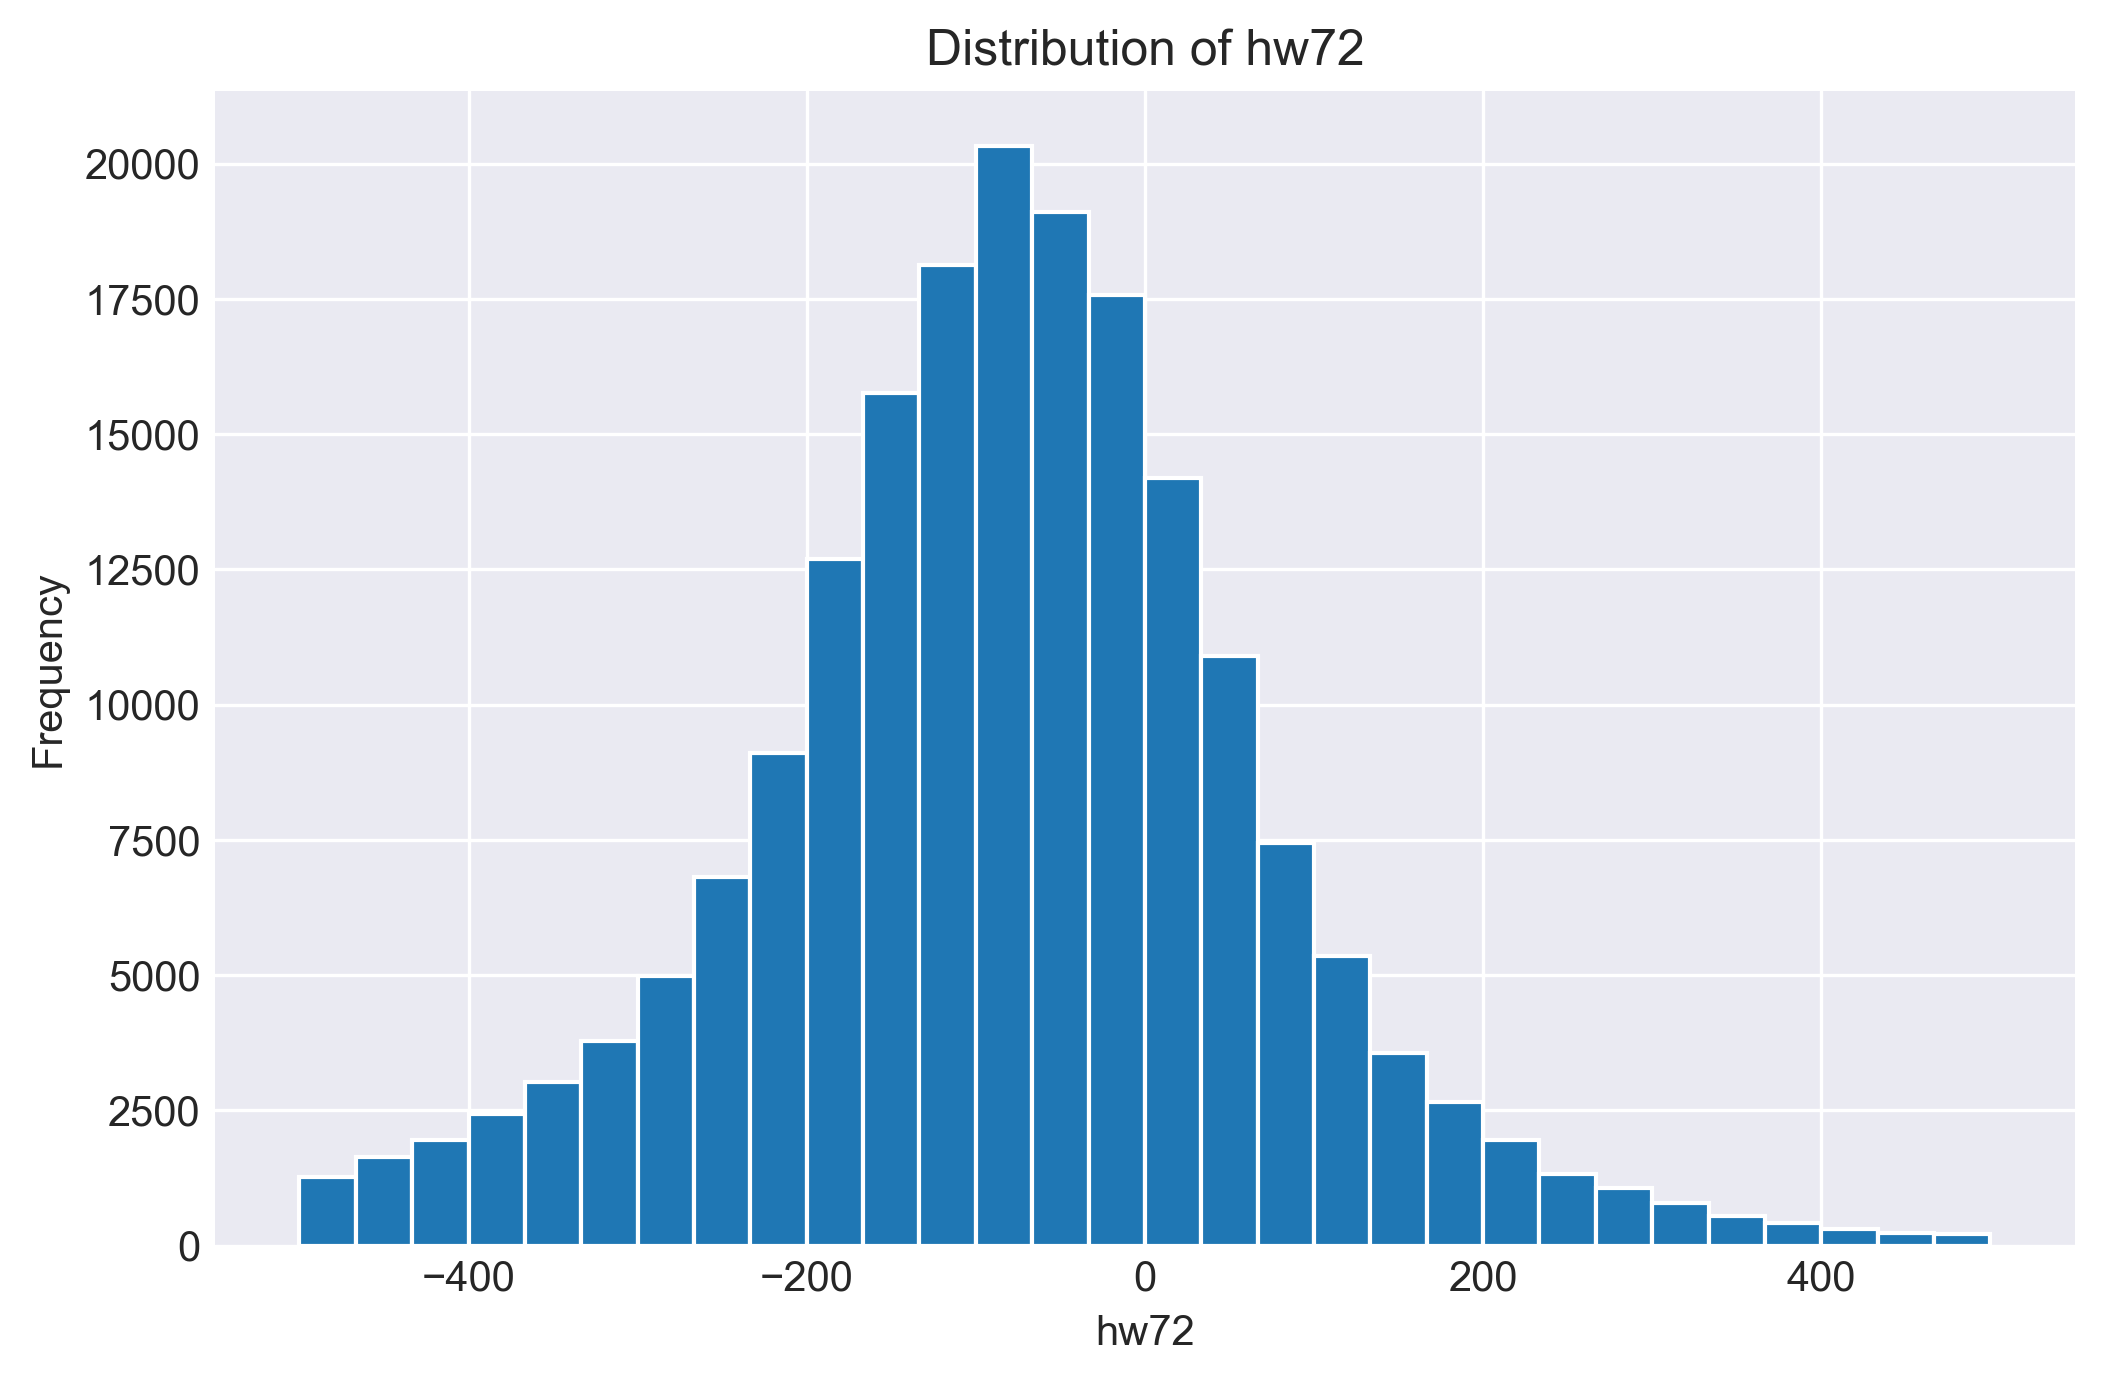

In [189]:
var = 'hw72'

plt.figure(figsize=(8, 5))
plt.hist(df[var].dropna(), bins=30)
plt.xlabel(var)
plt.ylabel('Frequency')
plt.title(f'Distribution of {var}')
plt.show()

In [ ]:
## set the categorical variables for stunting, underweight, wasting

df = df.copy()

df['stunting'] = (df['hw70'] < -200).astype(int)
df['underweight'] = (df['hw71'] < -200).astype(int)   
df['wasting'] = (df['hw72'] < -200).astype(int)
df.head()

,v005,v006,v007,v024,v025,sdist,v130,s116,sphase,hw70,hw71,hw72,stunting,underweight,wasting
1,193444,9,2019,1,2,1,2,4.0,1,565.0,150.0,-139.0,0,0,0
2,193444,9,2019,1,2,1,2,4.0,1,461.0,153.0,-116.0,0,0,0
4,193444,9,2019,1,2,1,2,4.0,1,298.0,-131.0,-432.0,0,0,1
5,201224,12,2019,1,2,1,2,4.0,1,13.0,272.0,393.0,0,0,0
7,201224,12,2019,1,2,1,2,4.0,1,51.0,304.0,350.0,0,0,0


In [191]:
from pandas.io.stata import StataReader 

with StataReader(input_path) as reader:
    labels = reader.value_labels()

In [ ]:
# use the stata file to obtain the labels for the categorical variables

state_labels = labels['V024']
dist_labels  = labels['SDIST']
religion_labels = labels['V130']
caste_labels = labels['S116']
rural_urban = labels['V025']

In [193]:
data = df.copy()

In [194]:
data["state_name"] = data["v024"].map(state_labels)
data["district_name"] = data["sdist"].map(dist_labels)
data["religion"] = data["v130"].map(religion_labels)
data["caste"] = data["s116"].map(caste_labels)
data["rural_urban"] = data["v025"].map(rural_urban)

In [ ]:
# what does the data look like now?

data.head()

,v005,v006,v007,v024,v025,sdist,v130,s116,sphase,hw70,hw71,hw72,stunting,underweight,wasting,state_name,district_name,religion,caste,rural_urban
1,193444,9,2019,1,2,1,2,4.0,1,565.0,150.0,-139.0,0,0,0,jammu & kashmir,kupwara,muslim,none of them,rural
2,193444,9,2019,1,2,1,2,4.0,1,461.0,153.0,-116.0,0,0,0,jammu & kashmir,kupwara,muslim,none of them,rural
4,193444,9,2019,1,2,1,2,4.0,1,298.0,-131.0,-432.0,0,0,1,jammu & kashmir,kupwara,muslim,none of them,rural
5,201224,12,2019,1,2,1,2,4.0,1,13.0,272.0,393.0,0,0,0,jammu & kashmir,kupwara,muslim,none of them,rural
7,201224,12,2019,1,2,1,2,4.0,1,51.0,304.0,350.0,0,0,0,jammu & kashmir,kupwara,muslim,none of them,rural


In [ ]:
# subset the hindu population, clean up the caste variable, and define the sc/st flag

df = data[data['religion'] == 'hindu'] # hindu subset

# drop "don't know".
# CAUTION CHECK FOR SELECTION BIAS LATER
df = df[
    (df['caste'] != "don't know") &
    (df['caste'].notna())
]

# define sc/st flag
df['scst'] = df['caste'].isin(["schedule caste", "schedule tribe"]).astype(int)

In [ ]:
# use the state_name, district_name to create state_district id

df["state_district"] = df["state_name"] + " - " + df["district_name"]

In [199]:
def pct(series, value):
    return (series == value).mean() * 100

In [ ]:
# use the weight as defined by v005

df['w'] = df['v005'] / 1_000_000

In [ ]:
# form grouped variables per district based on the weighting 

outcome_variables = ['hw70', 'hw71', 'hw72']
cat_outcome_variables = ['stunting', 'underweight', 'wasting']

# Weighted helper functions
def wmean(values, weights):
    return np.average(values, weights=weights) if len(values) > 0 else np.nan

def wpct(values, weights, target=1):
    mask = (values == target)
    if mask.sum() == 0:
        return 0
    return np.average(mask, weights=weights)

# -------------------------
# Base aggregation dictionary
# -------------------------

agg_dict = {
    'state_name': ('state_name', 'first'),
    'district_name': ('district_name', 'first'),
    'phase': ('sphase', 'first'),
    'survey_month': ('v006', 'first'),
    'survey_year': ('v007', 'first'),

    # counts (unweighted is fine)
    'scst_count': ('scst', lambda x: (x==1).sum()),
    'fc_count': ('scst', lambda x: (x==0).sum()),

    # weighted rural/urban proportions
    'pct_rural': ('rural_urban', 
                  lambda x: wpct(x, df.loc[x.index, 'w'], 'rural')),
    'pct_urban': ('rural_urban', 
                  lambda x: wpct(x, df.loc[x.index, 'w'], 'urban')),
}

# -------------------------
# Continuous outcomes: hw70 hw71 hw72
# -------------------------

for outcome in outcome_variables:
    agg_dict[f'scst_{outcome}_mean'] = (
        outcome, 
        lambda x, ov=outcome: wmean(
            x[df.loc[x.index, 'scst'] == 1],
            df.loc[x.index, 'w'][df.loc[x.index, 'scst'] == 1]
        )
    )

    agg_dict[f'fc_{outcome}_mean'] = (
        outcome, 
        lambda x, ov=outcome: wmean(
            x[df.loc[x.index, 'scst'] == 0],
            df.loc[x.index, 'w'][df.loc[x.index, 'scst'] == 0]
        )
    )

# -------------------------
# Categorical outcomes: stunting, underweight, wasting
# -------------------------

for cov in cat_outcome_variables:
    agg_dict[f'scst_{cov}_pct'] = (
        cov, 
        lambda x, c=cov: wpct(
            x[df.loc[x.index, 'scst'] == 1],
            df.loc[x.index, 'w'][df.loc[x.index, 'scst'] == 1],
            target=1
        )
    )

    agg_dict[f'fc_{cov}_pct'] = (
        cov, 
        lambda x, c=cov: wpct(
            x[df.loc[x.index, 'scst'] == 0],
            df.loc[x.index, 'w'][df.loc[x.index, 'scst'] == 0],
            target=1
        )
    )

In [ ]:
agg_df = df.groupby('state_district').agg(**agg_dict).reset_index()

In [204]:
agg_df.head(50)

,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,pct_urban,scst_hw70_mean,fc_hw70_mean,scst_hw71_mean,fc_hw71_mean,scst_hw72_mean,fc_hw72_mean,scst_stunting_pct,fc_stunting_pct,scst_underweight_pct,fc_underweight_pct,scst_wasting_pct,fc_wasting_pct
0,andaman & nicobar islands - nicobars,andaman & nicobar islands,nicobars,1,1,2020,0,10,1.000000,0.000000,NaN,-169.862766,NaN,-194.052737,NaN,-115.445260,0.000000,0.486101,0.000000,0.590923,0.000000,0.386869
1,andaman & nicobar islands - north & middle an...,andaman & nicobar islands,north & middle andaman,1,10,2019,0,73,1.000000,0.000000,NaN,-95.402469,NaN,-141.545154,NaN,-118.837583,0.000000,0.228903,0.000000,0.330817,0.000000,0.277325
2,andaman & nicobar islands - south andaman,andaman & nicobar islands,south andaman,1,12,2019,3,77,0.298962,0.701038,-42.735946,-85.982027,-20.995503,-75.787405,19.243816,-36.618326,0.339246,0.098122,0.000000,0.122324,0.000000,0.096141
3,andhra pradesh - anantapur,andhra pradesh,anantapur,1,10,2019,58,119,0.715638,0.284362,-193.768816,-149.146415,-177.435370,-161.610643,-96.955031,-103.129328,0.471931,0.364716,0.483565,0.377471,0.196905,0.170152
4,andhra pradesh - chittoor,andhra pradesh,chittoor,1,9,2019,84,99,0.808412,0.191588,-150.342773,-122.144618,-168.581375,-134.600520,-120.895570,-94.700375,0.343521,0.204724,0.358084,0.217545,0.181030,0.094930
5,andhra pradesh - east godavari,andhra pradesh,east godavari,1,7,2019,19,116,0.709104,0.290896,-195.303041,-94.551523,-168.332703,-113.019923,-79.924264,-85.952632,0.400964,0.173558,0.406912,0.182651,0.101399,0.150020
6,andhra pradesh - guntur,andhra pradesh,guntur,1,8,2019,22,74,0.664623,0.335377,-109.439444,-123.764370,-96.985816,-116.027025,-41.379402,-62.799414,0.213061,0.262750,0.127676,0.264472,0.124325,0.178033
7,andhra pradesh - krishna,andhra pradesh,krishna,1,8,2019,28,92,0.630143,0.369857,-124.084155,-103.451851,-108.874045,-103.680944,-50.809077,-63.664576,0.444706,0.269729,0.253952,0.184660,0.070957,0.147881
8,andhra pradesh - kurnool,andhra pradesh,kurnool,1,10,2019,40,139,0.823835,0.176165,-206.524077,-205.147912,-190.939946,-204.642551,-106.020109,-120.309248,0.478579,0.530598,0.430193,0.509900,0.089608,0.176247
9,andhra pradesh - prakasam,andhra pradesh,prakasam,1,9,2019,22,97,0.727592,0.272408,-98.341981,-126.431673,-114.292533,-115.692015,-85.996808,-62.644090,0.194712,0.237527,0.237370,0.238501,0.179901,0.067948


In [205]:
og_length = len(agg_df)
agg_df = agg_df.dropna()

print(f"{og_length - len(agg_df)} rows dropped due to NA values. Remaining rows: {len(agg_df)}")

22 rows dropped due to NA values. Remaining rows: 662


In [206]:
# checking that the shphase mapping is consistent within districts

## this should return an empty dataframe if each district has a unique shphase

conflicts = data.groupby('sdist')['sphase'].transform('nunique') > 1
data[conflicts].sort_values('sdist')

,v005,v006,v007,v024,v025,sdist,v130,s116,sphase,hw70,hw71,hw72,stunting,underweight,wasting,state_name,district_name,religion,caste,rural_urban


### Adding COVID Data into the above

In [207]:
covid_df = pd.read_csv("covid_districts.csv")

In [208]:
covid_df.head()

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,NaN
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN


In [ ]:
# convert data/month formats

covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')
covid_df['month'] = covid_df['Date'].dt.to_period('M')
covid_df['month'].value_counts().sort_index()

month
2020-04     2124
2020-05    16561
2020-06    19399
2020-07    20291
2020-08    20321
2020-09    19707
2020-10    20364
2020-11    19680
2020-12    20336
2021-01    20350
2021-02    18397
2021-03    20367
2021-04    19710
2021-05    20352
2021-06    19682
2021-07    20393
2021-08    20398
2021-09    19763
2021-10    20438
Freq: M, Name: count, dtype: int64

In [ ]:
# group the data by state, district, and year-month. this forms the cumulative timeseries for confirmed COVID counts

covid_df['YearMonth'] = covid_df['Date'].dt.to_period('M')

# Group by State, District, and Month, sum Confirmed cases
monthly = covid_df.groupby(['State', 'District', 'YearMonth'])['Confirmed'].sum().reset_index()

# Pivot so each month becomes a column
monthly_pivot = monthly.pivot_table(index=['State', 'District'],
                                    columns='YearMonth',
                                    values='Confirmed',
                                    fill_value=0)

# Optional: flatten columns
monthly_pivot.columns = [f'Confirmed_{str(col)}' for col in monthly_pivot.columns]

# Reset index to get State and District as columns
monthly_pivot = monthly_pivot.reset_index()


In [211]:
monthly_pivot.head()

,State,District,Confirmed_2020-04,Confirmed_2020-05,Confirmed_2020-06,Confirmed_2020-07,Confirmed_2020-08,Confirmed_2020-09,Confirmed_2020-10,Confirmed_2020-11,Confirmed_2020-12,Confirmed_2021-01,Confirmed_2021-02,Confirmed_2021-03,Confirmed_2021-04,Confirmed_2021-05,Confirmed_2021-06,Confirmed_2021-07,Confirmed_2021-08,Confirmed_2021-09,Confirmed_2021-10
0,Andaman and Nicobar Islands,Unknown,165.0,1023.0,1429.0,6799.0,66450.0,106513.0,126625.0,136389.0,150051.0,154236.0,140235.0,156117.0,161221.0,204145.0,218638.0,232698.0,234090.0,227816.0,236808.0
1,Andhra Pradesh,Anantapur,279.0,3922.0,19647.0,171505.0,903532.0,1507013.0,1912915.0,1979793.0,2078635.0,2093552.0,1895555.0,2106768.0,2165909.0,3500097.0,4474983.0,4815673.0,4859913.0,4722575.0,4889653.0
2,Andhra Pradesh,Chittoor,377.0,4990.0,14320.0,133273.0,724183.0,1519390.0,2230789.0,2454704.0,2636555.0,2688028.0,2442389.0,2736711.0,3002129.0,4864235.0,6267293.0,7009075.0,7286627.0,7238130.0,7614862.0
3,Andhra Pradesh,East Godavari,199.0,2183.0,14896.0,210149.0,1252228.0,2392989.0,3357256.0,3601587.0,3815885.0,3844900.0,3482138.0,3868317.0,3896299.0,5710600.0,7469018.0,8418968.0,8753094.0,8657651.0,9075399.0
4,Andhra Pradesh,Foreign Evacuees,0.0,728.0,7409.0,13254.0,13454.0,13020.0,13454.0,13020.0,13454.0,13454.0,12152.0,13454.0,13020.0,13454.0,13020.0,13454.0,13454.0,13020.0,13454.0


In [ ]:
# THIS IS THE CODE TO MATCH THE STATE NAMES BETWEEN THE AGGREGATED DATA AND THE COVID DATA

from rapidfuzz import process, fuzz
import pandas as pd

# Convert to lowercase for comparison
agg_states = agg_df['state_name'].str.lower().unique()
pivot_states = monthly_pivot['State'].str.lower().unique()

# Dictionary to store best matches
state_matches = {}

for state in agg_states:
    # Find the closest match in pivot_states
    match, score, _ = process.extractOne(state, pivot_states, scorer=fuzz.ratio)
    state_matches[state] = {'best_match': match, 'score': score}

# Convert to DataFrame for easy inspection
state_matches_df = pd.DataFrame.from_dict(state_matches, orient='index').reset_index()
state_matches_df = state_matches_df.rename(columns={'index': 'agg_state'})

# Filter entries where match is not exact
state_mismatches = state_matches_df[state_matches_df['score'] != 100]

state_mismatches

,agg_state,best_match,score
0,andaman & nicobar islands,andaman and nicobar islands,92.307692
7,dadra & nagar haveli and daman & diu,dadra and nagar haveli and daman and diu,89.473684
12,jammu & kashmir,jammu and kashmir,87.500000
22,nct of delhi,delhi,58.823529


In [ ]:
# PERFORM REQUIRED FIXES ON STATE NAMES

monthly_pivot['State'] = monthly_pivot['State'].str.lower()

mapping = {
    'andaman and nicobar islands': 'andaman & nicobar islands',
    'dadra and nagar haveli and daman and diu': 'dadra & nagar haveli and daman & diu',
    'jammu and kashmir': 'jammu & kashmir',
    'delhi': 'nct of delhi'
}

monthly_pivot['State'] = monthly_pivot['State'].replace(mapping)

In [ ]:
# NOW IDENTIFY DISTRICT LEVEL MISMATCHES. THIS DOES NOT NEED TO BE RUN AGAIN (I HAVE DONE THIS MANUALLY)

# Ensure lowercase for case-insensitive matching
agg_df['district_name'] = agg_df['district_name'].str.lower()
agg_df['state_name'] = agg_df['state_name'].str.lower()
monthly_pivot['District'] = monthly_pivot['District'].str.lower()
monthly_pivot['State'] = monthly_pivot['State'].str.lower()

# List to collect mismatches
mismatch_records = []

# Loop over each state in agg_df
for state in agg_df['state_name'].unique():
    # Districts in this state in monthly_pivot
    pivot_districts = monthly_pivot[monthly_pivot['State'] == state]['District'].unique()
    
    # Districts in this state in agg_df
    agg_mask = agg_df['state_name'] == state
    agg_districts = agg_df.loc[agg_mask, 'district_name'].unique()
    
    # Compare each agg district with pivot_districts
    for district in agg_districts:
        match, score, _ = process.extractOne(district, pivot_districts, scorer=fuzz.ratio)
        if score != 100:  # only report non-exact matches
            mismatch_records.append({
                'State': state,
                'agg_district': district,
                'best_match_in_pivot': match,
                'score': score
            })

# Convert to DataFrame for inspection
district_mismatches = pd.DataFrame(mismatch_records)

district_mismatches.to_csv("district_mismatches.csv", index=False)

In [215]:
state = 'uttar pradesh'
temp_districts = monthly_pivot[monthly_pivot['State'] == state]['District'].unique()

for district in temp_districts:
    print(district)

agra
aligarh
ambedkar nagar
amethi
amroha
auraiya
ayodhya
azamgarh
baghpat
bahraich
ballia
balrampur
banda
barabanki
bareilly
basti
bhadohi
bijnor
budaun
bulandshahr
chandauli
chitrakoot
deoria
etah
etawah
farrukhabad
fatehpur
firozabad
gautam buddha nagar
ghaziabad
ghazipur
gonda
gorakhpur
hamirpur
hapur
hardoi
hathras
jalaun
jaunpur
jhansi
kannauj
kanpur dehat
kanpur nagar
kasganj
kaushambi
kushinagar
lakhimpur kheri
lalitpur
lucknow
maharajganj
mahoba
mainpuri
mathura
mau
meerut
mirzapur
moradabad
muzaffarnagar
pilibhit
pratapgarh
prayagraj
rae bareli
rampur
saharanpur
sambhal
sant kabir nagar
shahjahanpur
shamli
shrawasti
siddharthnagar
sitapur
sonbhadra
sultanpur
unnao
varanasi


In [216]:
# STATES WITH ISSUES IN COVID DATA: ANDAMAN, SIKKIM, ASSAM (only few district names specified), MANIPUR (only few district names specified), 
# DELHI (the different districts are not differentiated), TELANGANA (no district data at all), 

### Merge COVID Data

In [ ]:
# THIS CODE BLOCK IS TO FIX THE DISTRICT NAMES BETWEEN THE AGGREGATED DATA AND THE COVID DATA

# Read the CSV with corrections
## THIS CSV FILE BELOW I HAVE EDITED MANUALLY TO FIX THE DISTRICT NAMES
district_mismatches = pd.read_csv("district_mismatches_edited.csv")

# Ensure lowercase for safe matching
agg_df['state_name'] = agg_df['state_name'].str.lower()
agg_df['district_name'] = agg_df['district_name'].str.lower()
district_mismatches['State'] = district_mismatches['State'].str.lower()
district_mismatches['agg_district'] = district_mismatches['agg_district'].str.lower()
district_mismatches['best_match_in_pivot'] = district_mismatches['best_match_in_pivot'].str.lower()

# Create a dictionary mapping (State, agg_district) -> best_match_in_pivot
mapping = {
    (row['State'], row['agg_district']): row['best_match_in_pivot']
    for _, row in district_mismatches.iterrows()
}

# Function to apply mapping
def replace_district(row):
    key = (row['state_name'], row['district_name'])
    return mapping.get(key, row['district_name'])  # default to original if no match

# Apply to agg_df
agg_df['district_name'] = agg_df.apply(replace_district, axis=1)


In [218]:
agg_df.head()

,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,pct_urban,scst_hw70_mean,fc_hw70_mean,scst_hw71_mean,fc_hw71_mean,scst_hw72_mean,fc_hw72_mean,scst_stunting_pct,fc_stunting_pct,scst_underweight_pct,fc_underweight_pct,scst_wasting_pct,fc_wasting_pct
2,andaman & nicobar islands - south andaman,andaman & nicobar islands,south andaman,1,12,2019,3,77,0.298962,0.701038,-42.735946,-85.982027,-20.995503,-75.787405,19.243816,-36.618326,0.339246,0.098122,0.000000,0.122324,0.000000,0.096141
3,andhra pradesh - anantapur,andhra pradesh,anantapur,1,10,2019,58,119,0.715638,0.284362,-193.768816,-149.146415,-177.435370,-161.610643,-96.955031,-103.129328,0.471931,0.364716,0.483565,0.377471,0.196905,0.170152
4,andhra pradesh - chittoor,andhra pradesh,chittoor,1,9,2019,84,99,0.808412,0.191588,-150.342773,-122.144618,-168.581375,-134.600520,-120.895570,-94.700375,0.343521,0.204724,0.358084,0.217545,0.181030,0.094930
5,andhra pradesh - east godavari,andhra pradesh,east godavari,1,7,2019,19,116,0.709104,0.290896,-195.303041,-94.551523,-168.332703,-113.019923,-79.924264,-85.952632,0.400964,0.173558,0.406912,0.182651,0.101399,0.150020
6,andhra pradesh - guntur,andhra pradesh,guntur,1,8,2019,22,74,0.664623,0.335377,-109.439444,-123.764370,-96.985816,-116.027025,-41.379402,-62.799414,0.213061,0.262750,0.127676,0.264472,0.124325,0.178033


In [ ]:
# Now that the state and district names are fixed, we can proceed to merge the COVID data with the aggregated data

# Ensure lowercase and strip spaces for safe matching
agg_df['state_district'] = (
    agg_df['state_name'].str.lower().str.strip() + "_" +
    agg_df['district_name'].str.lower().str.strip()
)

monthly_pivot['state_district'] = (
    monthly_pivot['State'].str.lower().str.strip() + "_" +
    monthly_pivot['District'].str.lower().str.strip()
)

# Record original length
original_len = len(agg_df)

# Columns to merge: all monthly_pivot columns except 'state_district' (key is already used)
cols_to_merge = monthly_pivot.columns.tolist()
# Optionally remove the key column to avoid duplication
cols_to_merge.remove('state_district')

# Perform inner join
agg_df = agg_df.merge(
    monthly_pivot[['state_district'] + cols_to_merge],
    on='state_district',
    how='inner'
)

# Report dropped rows
dropped_rows = original_len - len(agg_df)
print(f"Number of rows dropped due to no match: {dropped_rows}")

Number of rows dropped due to no match: 34


In [220]:
agg_df.head(50)

,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,pct_urban,scst_hw70_mean,fc_hw70_mean,scst_hw71_mean,fc_hw71_mean,scst_hw72_mean,fc_hw72_mean,scst_stunting_pct,fc_stunting_pct,scst_underweight_pct,fc_underweight_pct,scst_wasting_pct,fc_wasting_pct,State,District,Confirmed_2020-04,Confirmed_2020-05,Confirmed_2020-06,Confirmed_2020-07,Confirmed_2020-08,Confirmed_2020-09,Confirmed_2020-10,Confirmed_2020-11,Confirmed_2020-12,Confirmed_2021-01,Confirmed_2021-02,Confirmed_2021-03,Confirmed_2021-04,Confirmed_2021-05,Confirmed_2021-06,Confirmed_2021-07,Confirmed_2021-08,Confirmed_2021-09,Confirmed_2021-10
0,andhra pradesh_anantapur,andhra pradesh,anantapur,1,10,2019,58,119,0.715638,0.284362,-193.768816,-149.146415,-177.435370,-161.610643,-96.955031,-103.129328,0.471931,0.364716,0.483565,0.377471,0.196905,0.170152,andhra pradesh,anantapur,279.0,3922.0,19647.0,171505.0,903532.0,1507013.0,1912915.0,1979793.0,2078635.0,2093552.0,1895555.0,2106768.0,2165909.0,3500097.0,4474983.0,4815673.0,4859913.0,4722575.0,4889653.0
1,andhra pradesh_chittoor,andhra pradesh,chittoor,1,9,2019,84,99,0.808412,0.191588,-150.342773,-122.144618,-168.581375,-134.600520,-120.895570,-94.700375,0.343521,0.204724,0.358084,0.217545,0.181030,0.094930,andhra pradesh,chittoor,377.0,4990.0,14320.0,133273.0,724183.0,1519390.0,2230789.0,2454704.0,2636555.0,2688028.0,2442389.0,2736711.0,3002129.0,4864235.0,6267293.0,7009075.0,7286627.0,7238130.0,7614862.0
2,andhra pradesh_east godavari,andhra pradesh,east godavari,1,7,2019,19,116,0.709104,0.290896,-195.303041,-94.551523,-168.332703,-113.019923,-79.924264,-85.952632,0.400964,0.173558,0.406912,0.182651,0.101399,0.150020,andhra pradesh,east godavari,199.0,2183.0,14896.0,210149.0,1252228.0,2392989.0,3357256.0,3601587.0,3815885.0,3844900.0,3482138.0,3868317.0,3896299.0,5710600.0,7469018.0,8418968.0,8753094.0,8657651.0,9075399.0
3,andhra pradesh_guntur,andhra pradesh,guntur,1,8,2019,22,74,0.664623,0.335377,-109.439444,-123.764370,-96.985816,-116.027025,-41.379402,-62.799414,0.213061,0.262750,0.127676,0.264472,0.124325,0.178033,andhra pradesh,guntur,1275.0,12466.0,22282.0,172776.0,806941.0,1391078.0,1907858.0,2122694.0,2293757.0,2331772.0,2117312.0,2362847.0,2613828.0,4066211.0,4725976.0,5132384.0,5287548.0,5230624.0,5493555.0
4,andhra pradesh_krishna,andhra pradesh,krishna,1,8,2019,28,92,0.630143,0.369857,-124.084155,-103.451851,-108.874045,-103.680944,-50.809077,-63.664576,0.444706,0.269729,0.253952,0.184660,0.070957,0.147881,andhra pradesh,krishna,1092.0,11237.0,25189.0,107319.0,372303.0,661987.0,1043413.0,1291192.0,1451374.0,1497030.0,1366828.0,1528867.0,1644333.0,2359597.0,2889819.0,3263822.0,3462850.0,3473700.0,3672438.0
5,andhra pradesh_kurnool,andhra pradesh,kurnool,1,10,2019,40,139,0.823835,0.176165,-206.524077,-205.147912,-190.939946,-204.642551,-106.020109,-120.309248,0.478579,0.530598,0.430193,0.509900,0.089608,0.176247,andhra pradesh,kurnool,1632.0,18397.0,34189.0,199287.0,1009927.0,1557967.0,1809475.0,1797348.0,1872992.0,1882013.0,1703725.0,1893676.0,1996217.0,3085403.0,3587989.0,3804496.0,3831032.0,3718166.0,3846521.0
6,andhra pradesh_prakasam,andhra pradesh,prakasam,1,9,2019,22,97,0.727592,0.272408,-98.341981,-126.431673,-114.292533,-115.692015,-85.996808,-62.644090,0.194712,0.237527,0.237370,0.238501,0.179901,0.067948,andhra pradesh,prakasam,288.0,2032.0,4545.0,61175.0,395777.0,1121819.0,1718223.0,1825215.0,1916067.0,1925499.0,1741363.0,1931012.0,1968559.0,2826418.0,3466650.0,3902714.0,4089844.0,4065736.0,4281112.0
7,andhra pradesh_s.p.s. nellore,andhra pradesh,s.p.s. nellore,1,9,2019,91,94,0.763665,0.236335,-166.614400,-82.434598,-171.749125,-118.655592,-104.710810,-99.770854,0.361406,0.186485,0.373703,0.198325,0.188673,0.178440,andhra pradesh,s.p.s. nellore,399.0,4586.0,12518.0,74858.0,555320.0,1317870.0,1772936.0,1822117.0,1916641.0,1929361.0,1747215.0,1941513.0,2059854.0,3161946.0,3711749.0,4059174.0,4265058.0,4286955.0,4522678.0
8,andhra pradesh_srikakulam

In [221]:
print(len(agg_df))

628


In [222]:
agg_df.to_csv("aggreg_data_child_v3.csv")

In [223]:
agg_df["district_name"]

0              anantapur
1               chittoor
2          east godavari
3                 guntur
4                krishna
             ...        
623      purba bardhaman
624      purba medinipur
625              purulia
626    south 24 parganas
627       uttar dinajpur
Name: district_name, Length: 628, dtype: object

In [224]:
import pandas as pd

### SKIPPABLE: India District Maps (THIS IS JUST FOR GETTING THE MAP OF DISTRICTS IN PHASE-1 ANDs PHASE-2)

In [ ]:
# THIS PORTION DOES NOT NEED TO BE RERUN THIS IS JUST FOR GETTING THE MAP OF DISTRICTS IN PHASE-1 ANDs PHASE-2

import geopandas as gpd

# 1. Read the shapefile
gdf = gpd.read_file("india_districts.shp")

# 2. See available columns
print(gdf.columns)

# 3. Get unique State names
states = sorted(gdf['state'].unique())
print("States:", states)

# 4. Get unique District names
districts = sorted(gdf['district'].unique())
print("Districts:", districts)

# 5. If you want a combined list of (State, District)
pairs = gdf[['state', 'district']].drop_duplicates()

Index(['district', 'state', 'country', 'st_perimet', 'geometry'], dtype='object')
States: ['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadar & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Districts: ['Adilabad', 'Agar Malwa', 'Agra', 'Ahmadabad', 'Ahmadnagar', 'Aizwal', 'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Alipurduar', 'Alirajpur', 'Almora', 'Alwar', 'Amaravati', 'Ambala', 'Ambedkarnagar', 'Amethi', 'Amreli', 'Amritsar', 'Amroha', 'Anand', 'Ananthapur', 'Anantnag', 'Angul', 'Anjaw', 'Anuppur', 'Arariya', 'Aravalli', 'Ariyalur', 'Arwal', 'Ashoknagar', 'Auraiya', 'Aurangabad', 

In [227]:
from rapidfuzz import process, fuzz
import pandas as pd

# Unique state names in lowercase
agg_states = agg_df['state_name'].dropna().str.lower().unique()
gdf_states = gdf['state'].dropna().str.lower().unique()

# Create a mapping dictionary
mapping = {}

for state in agg_states:
    # Find the best match in gdf_states
    match, score, _ = process.extractOne(state, gdf_states, scorer=fuzz.token_sort_ratio)
    
    # If exact match, skip
    if state != match:
        mapping[state] = match

# Convert mapping to DataFrame for inspection
mapping_df = pd.DataFrame(list(mapping.items()), columns=['agg_state_name', 'closest_gdf_state_name'])
mapping_df

,agg_state_name,closest_gdf_state_name
0,dadra & nagar haveli and daman & diu,dadar & nagar haveli
1,jammu & kashmir,jammu and kashmir
2,nct of delhi,delhi


In [228]:
matching_dict = {'dadra & nagar haveli and daman & diu': 'dadar & nagar haveli',
                 'jammu & kashmir': 'jammu and kashmir',
                 'nct of delhi': 'delhi'}
# Rename state names using the mapping
agg_df['state_name'] = agg_df['state_name'].replace(matching_dict)

# Verify changes
agg_df['state_name'].unique()


array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chandigarh', 'chhattisgarh', 'dadar & nagar haveli', 'gujarat',
       'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'delhi', 'odisha',
       'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu',
       'telangana', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal'], dtype=object)

In [229]:
import pandas as pd
from rapidfuzz import process, fuzz

# Make lowercase copies to improve matching
agg_df['state_lower'] = agg_df['state_name'].str.lower().str.strip()
agg_df['district_lower'] = agg_df['district_name'].str.lower().str.strip()
gdf['state_lower'] = gdf['state'].str.lower().str.strip()
gdf['district_lower'] = gdf['district'].str.lower().str.strip()

results = []

# Iterate over each state in agg_df
for state in agg_df['state_lower'].unique():
    # Get districts in this state from agg_df
    agg_districts = agg_df.loc[agg_df['state_lower'] == state, 'district_lower'].unique()
    
    # Get districts in this state from gdf
    gdf_districts = gdf.loc[gdf['state_lower'] == state, 'district_lower'].unique()
    
    for district in agg_districts:
        # Skip if exact match exists
        if district in gdf_districts:
            continue
        
        # Fuzzy match within the same state
        match, score, _ = process.extractOne(district, gdf_districts, scorer=fuzz.token_sort_ratio)
        
        # Keep only non-100 matches
        if score < 100:
            results.append({
                'state': state,
                'agg_district_name': district,
                'closest_gdf_district_name': match,
                'score': score
            })

# Convert results to DataFrame
fuzzy_matches_df = pd.DataFrame(results)

# Write to CSV
#fuzzy_matches_df.to_csv("district_fuzzy_matches.csv", index=False)

print(f"Saved {len(fuzzy_matches_df)} fuzzy district matches to CSV.")


Saved 108 fuzzy district matches to CSV.


In [230]:
agg_df['state_name'] = agg_df['state_name'].str.lower()
agg_df['district_name'] = agg_df['district_name'].str.lower()
gdf['state'] = gdf['state'].str.lower()
gdf['district'] = gdf['district'].str.lower()

In [231]:
for district in gdf[gdf['state'] == 'west bengal']['district']:
    print(district.lower())

south 24 parganas
alipurduar
bankura
bardhaman
birbhum
hugli
darjeeling
kochbihar
dakshindinajpur
haora
kolkata
malda
eastmednipur
jalpaiguri
mursidabad
nadia
north 24 pargana
pashchim medinipur
puruliya
uttar_dinajpur


In [232]:
# 1. Read the CSV
fuzzy_df = pd.read_csv("district_fuzzy_matches_edited.csv")

# 2. Form the mapping dictionary: gdf name → agg_df name
mapping_dict = pd.Series(fuzzy_df['agg_district_name'].values, 
                         index=fuzzy_df['closest_gdf_district_name']).to_dict()

# 3. Replace gdf['district'] where the key exists
gdf['district'] = gdf['district'].replace(mapping_dict)

In [233]:
# phase 1 if year < 2020 OR year == 2020 and month <= 3
is_phase1 = (
    (agg_df['survey_year'] < 2020) |
    ((agg_df['survey_year'] == 2020) & (agg_df['survey_month'] <= 3))
)

# map: True -> 1 (phase1), False -> 2 (phase2)
agg_df['phase'] = is_phase1.astype(int).replace({1: 1, 0: 2})

In [234]:
agg_df.head()

,Unnamed: 0,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,pct_urban,scst_hw70_mean,fc_hw70_mean,scst_hw71_mean,fc_hw71_mean,scst_hw72_mean,fc_hw72_mean,scst_stunting_pct,fc_stunting_pct,scst_underweight_pct,fc_underweight_pct,scst_wasting_pct,fc_wasting_pct,State,District,Confirmed_2020-04,Confirmed_2020-05,Confirmed_2020-06,Confirmed_2020-07,Confirmed_2020-08,Confirmed_2020-09,Confirmed_2020-10,Confirmed_2020-11,Confirmed_2020-12,Confirmed_2021-01,Confirmed_2021-02,Confirmed_2021-03,Confirmed_2021-04,Confirmed_2021-05,Confirmed_2021-06,Confirmed_2021-07,Confirmed_2021-08,Confirmed_2021-09,Confirmed_2021-10,state_lower,district_lower
0,0,andhra pradesh_anantapur,andhra pradesh,anantapur,1,10,2019,58,119,0.715638,0.284362,-193.768816,-149.146415,-177.435370,-161.610643,-96.955031,-103.129328,0.471931,0.364716,0.483565,0.377471,0.196905,0.170152,andhra pradesh,anantapur,279.0,3922.0,19647.0,171505.0,903532.0,1507013.0,1912915.0,1979793.0,2078635.0,2093552.0,1895555.0,2106768.0,2165909.0,3500097.0,4474983.0,4815673.0,4859913.0,4722575.0,4889653.0,andhra pradesh,anantapur
1,1,andhra pradesh_chittoor,andhra pradesh,chittoor,1,9,2019,84,99,0.808412,0.191588,-150.342773,-122.144618,-168.581375,-134.600520,-120.895570,-94.700375,0.343521,0.204724,0.358084,0.217545,0.181030,0.094930,andhra pradesh,chittoor,377.0,4990.0,14320.0,133273.0,724183.0,1519390.0,2230789.0,2454704.0,2636555.0,2688028.0,2442389.0,2736711.0,3002129.0,4864235.0,6267293.0,7009075.0,7286627.0,7238130.0,7614862.0,andhra pradesh,chittoor
2,2,andhra pradesh_east godavari,andhra pradesh,east godavari,1,7,2019,19,116,0.709104,0.290896,-195.303041,-94.551523,-168.332703,-113.019923,-79.924264,-85.952632,0.400964,0.173558,0.406912,0.182651,0.101399,0.150020,andhra pradesh,east godavari,199.0,2183.0,14896.0,210149.0,1252228.0,2392989.0,3357256.0,3601587.0,3815885.0,3844900.0,3482138.0,3868317.0,3896299.0,5710600.0,7469018.0,8418968.0,8753094.0,8657651.0,9075399.0,andhra pradesh,east godavari
3,3,andhra pradesh_guntur,andhra pradesh,guntur,1,8,2019,22,74,0.664623,0.335377,-109.439444,-123.764370,-96.985816,-116.027025,-41.379402,-62.799414,0.213061,0.262750,0.127676,0.264472,0.124325,0.178033,andhra pradesh,guntur,1275.0,12466.0,22282.0,172776.0,806941.0,1391078.0,1907858.0,2122694.0,2293757.0,2331772.0,2117312.0,2362847.0,2613828.0,4066211.0,4725976.0,5132384.0,5287548.0,5230624.0,5493555.0,andhra pradesh,guntur
4,4,andhra pradesh_krishna,andhra pradesh,krishna,1,8,2019,28,92,0.630143,0.369857,-124.084155,-103.451851,-108.874045,-103.680944,-50.809077,-63.664576,0.444706,0.269729,0.253952,0.184660,0.070957,0.147881,andhra pradesh,krishna,1092.0,11237.0,25189.0,107319.0,372303.0,661987.0,1043413.0,1291192.0,1451374.0,1497030.0,1366828.0,1528867.0,1644333.0,2359597.0,2889819.0,3263822.0,3462850.0,3473700.0,3672438.0,andhra pradesh,krishna


In [235]:
# 1. Create a join key in both dataframes
gdf['state_district'] = gdf['state'].str.lower().str.strip() + "___" + gdf['district'].str.lower().str.strip()
agg_df['state_district'] = agg_df['state_name'].str.lower().str.strip() + "___" + agg_df['district_name'].str.lower().str.strip()

# 2. Merge 'phase' from agg_df into gdf
gdf = gdf.merge(agg_df[['state_district', 'phase']], on='state_district', how='left')

# 3. Drop districts without a phase
gdf = gdf.dropna(subset=['phase']).copy()

# 4. Verify
print(gdf[['state', 'district', 'phase']].head())


               state   district  phase
0  arunachal pradesh  changlang    2.0
1          jharkhand     chatra    2.0
2      uttar pradesh       etah    1.0
3      uttar pradesh     etawah    1.0
4            haryana  faridabad    2.0


In [236]:
gdf.head()

,district,state,country,st_perimet,geometry,state_lower,district_lower,state_district,phase
0,changlang,arunachal pradesh,India,632350.042751,"POLYGON ((10765215.59 3205001.694, 10765753.24...",arunachal pradesh,changlang,arunachal pradesh___changlang,2.0
1,chatra,jharkhand,India,584305.825065,"POLYGON ((9440822.353 2817132.541, 9440826.414...",jharkhand,chatra,jharkhand___chatra,2.0
2,etah,uttar pradesh,India,568724.360297,"POLYGON ((8744899.949 3221523.032, 8745222.926...",uttar pradesh,etah,uttar pradesh___etah,1.0
3,etawah,uttar pradesh,India,373559.937089,"POLYGON ((8814306.497 3124259.482, 8814638.735...",uttar pradesh,etawah,uttar pradesh___etawah,1.0
4,faridabad,haryana,India,175269.821357,"MULTIPOLYGON (((8610933.123 3312071.152, 86110...",haryana,faridabad,haryana___faridabad,2.0


In [237]:
import matplotlib.pyplot as plt

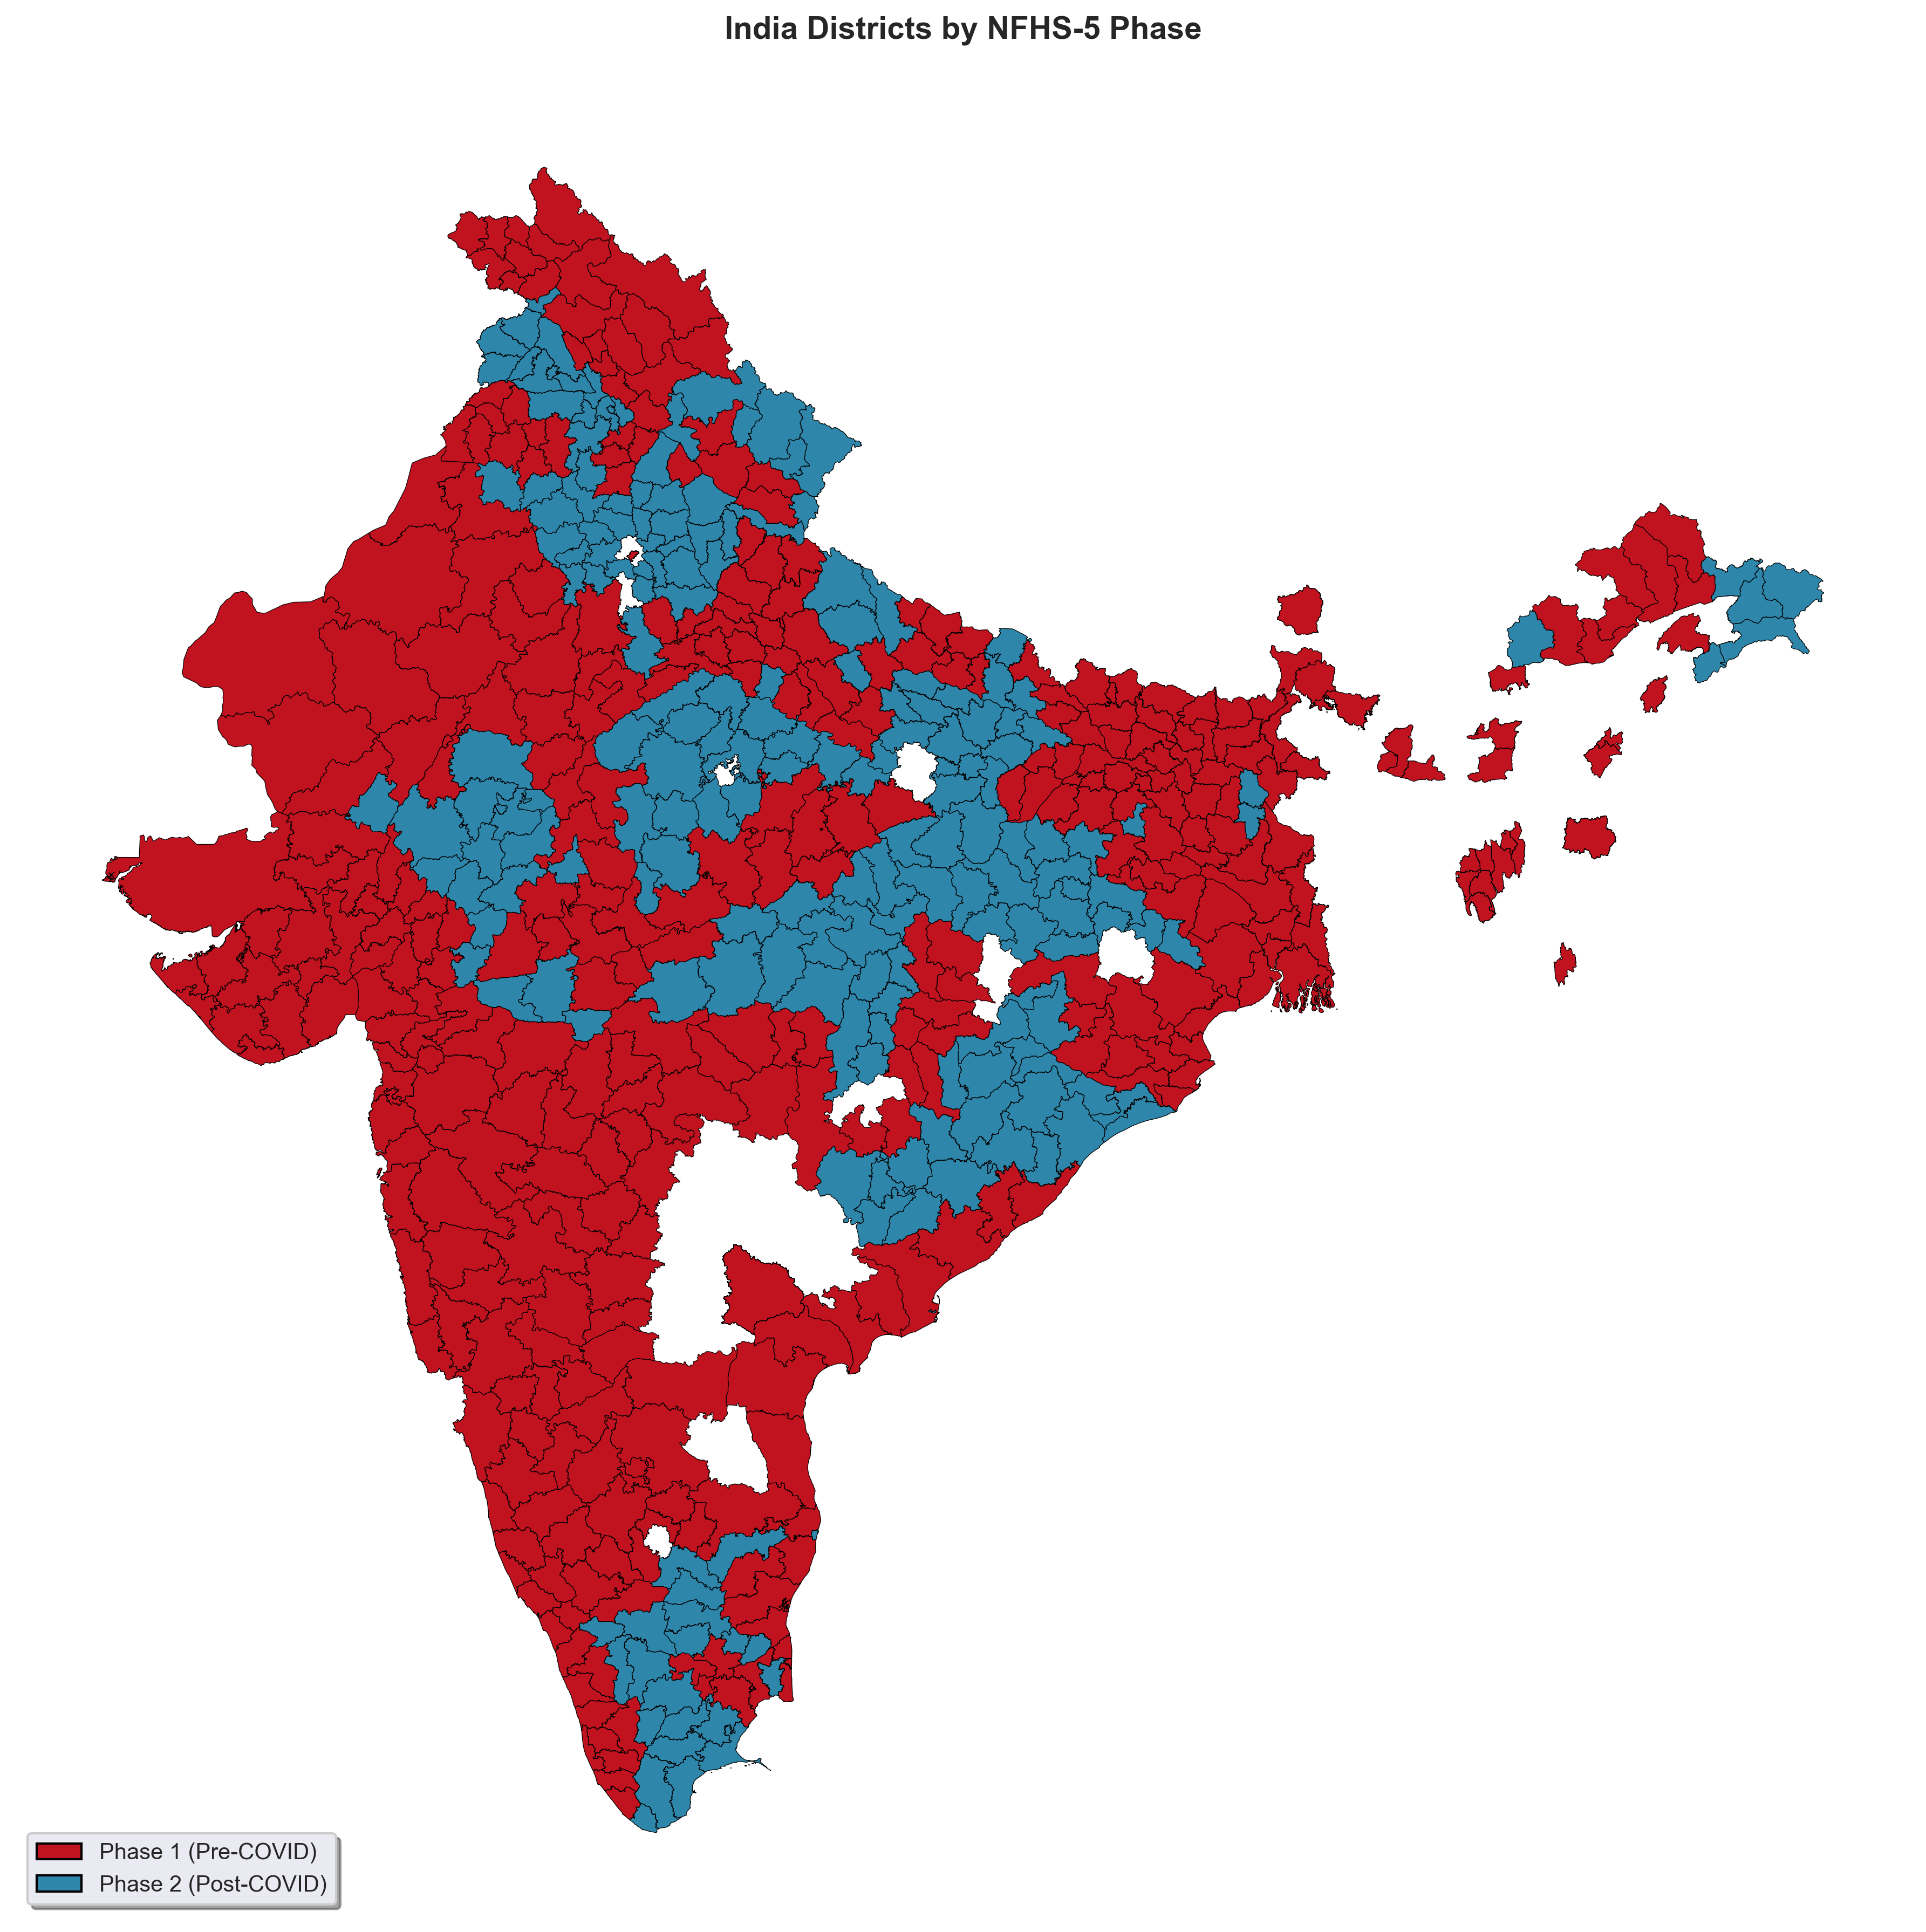

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import numpy as np

# ============================================================================
# PLOT 3: INDIA DISTRICTS MAP BY PHASE
# ============================================================================

# Convert to numeric first, coerce errors to NaN
gdf['phase_numeric'] = pd.to_numeric(gdf['phase'], errors='coerce')

# Drop any rows where phase is NaN (optional)
gdf = gdf.dropna(subset=['phase_numeric']).copy()

# Convert to int and then to string
gdf['phase'] = gdf['phase_numeric'].astype(int).astype(str)

# Drop the temporary column
gdf = gdf.drop(columns=['phase_numeric'])

# Set up a color map for phases
phase_colors = {'1': '#C1121F', '2': '#2E86AB'}

# Create a color column based on phase
gdf['color'] = gdf['phase'].map(phase_colors)

# Plot
fig, ax = plt.subplots(figsize=(12, 16))
gdf.plot(ax=ax, color=gdf['color'], edgecolor='black', linewidth=0.3)

# Add legend
legend_elements = [
    Patch(facecolor='#C1121F', edgecolor='black', label='Phase 1 (Pre-COVID)'),
    Patch(facecolor='#2E86AB', edgecolor='black', label='Phase 2 (Post-COVID)')
]
ax.legend(handles=legend_elements, loc='lower left', frameon=True,
          fancybox=True, shadow=True, fontsize=10)

# Customize
ax.set_title("India Districts by NFHS-5 Phase", fontsize=14, 
             fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.savefig('india_districts_by_phase.png', dpi=300, bbox_inches='tight')
plt.show()

### Exploratory Data Analysis (EDA)

In [241]:
import pandas as pd

In [ ]:
agg_df = pd.read_csv("aggreg_data_child_v3.csv")

In [243]:
pd.set_option('display.max_columns', None)
agg_df.head()

,Unnamed: 0,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,pct_urban,scst_hw70_mean,fc_hw70_mean,scst_hw71_mean,fc_hw71_mean,scst_hw72_mean,fc_hw72_mean,scst_stunting_pct,fc_stunting_pct,scst_underweight_pct,fc_underweight_pct,scst_wasting_pct,fc_wasting_pct,State,District,Confirmed_2020-04,Confirmed_2020-05,Confirmed_2020-06,Confirmed_2020-07,Confirmed_2020-08,Confirmed_2020-09,Confirmed_2020-10,Confirmed_2020-11,Confirmed_2020-12,Confirmed_2021-01,Confirmed_2021-02,Confirmed_2021-03,Confirmed_2021-04,Confirmed_2021-05,Confirmed_2021-06,Confirmed_2021-07,Confirmed_2021-08,Confirmed_2021-09,Confirmed_2021-10,state_lower,district_lower
0,0,andhra pradesh___anantapur,andhra pradesh,anantapur,1,10,2019,58,119,0.715638,0.284362,-193.768816,-149.146415,-177.435370,-161.610643,-96.955031,-103.129328,0.471931,0.364716,0.483565,0.377471,0.196905,0.170152,andhra pradesh,anantapur,279.0,3922.0,19647.0,171505.0,903532.0,1507013.0,1912915.0,1979793.0,2078635.0,2093552.0,1895555.0,2106768.0,2165909.0,3500097.0,4474983.0,4815673.0,4859913.0,4722575.0,4889653.0,andhra pradesh,anantapur
1,1,andhra pradesh___chittoor,andhra pradesh,chittoor,1,9,2019,84,99,0.808412,0.191588,-150.342773,-122.144618,-168.581375,-134.600520,-120.895570,-94.700375,0.343521,0.204724,0.358084,0.217545,0.181030,0.094930,andhra pradesh,chittoor,377.0,4990.0,14320.0,133273.0,724183.0,1519390.0,2230789.0,2454704.0,2636555.0,2688028.0,2442389.0,2736711.0,3002129.0,4864235.0,6267293.0,7009075.0,7286627.0,7238130.0,7614862.0,andhra pradesh,chittoor
2,2,andhra pradesh___east godavari,andhra pradesh,east godavari,1,7,2019,19,116,0.709104,0.290896,-195.303041,-94.551523,-168.332703,-113.019923,-79.924264,-85.952632,0.400964,0.173558,0.406912,0.182651,0.101399,0.150020,andhra pradesh,east godavari,199.0,2183.0,14896.0,210149.0,1252228.0,2392989.0,3357256.0,3601587.0,3815885.0,3844900.0,3482138.0,3868317.0,3896299.0,5710600.0,7469018.0,8418968.0,8753094.0,8657651.0,9075399.0,andhra pradesh,east godavari
3,3,andhra pradesh___guntur,andhra pradesh,guntur,1,8,2019,22,74,0.664623,0.335377,-109.439444,-123.764370,-96.985816,-116.027025,-41.379402,-62.799414,0.213061,0.262750,0.127676,0.264472,0.124325,0.178033,andhra pradesh,guntur,1275.0,12466.0,22282.0,172776.0,806941.0,1391078.0,1907858.0,2122694.0,2293757.0,2331772.0,2117312.0,2362847.0,2613828.0,4066211.0,4725976.0,5132384.0,5287548.0,5230624.0,5493555.0,andhra pradesh,guntur
4,4,andhra pradesh___krishna,andhra pradesh,krishna,1,8,2019,28,92,0.630143,0.369857,-124.084155,-103.451851,-108.874045,-103.680944,-50.809077,-63.664576,0.444706,0.269729,0.253952,0.184660,0.070957,0.147881,andhra pradesh,krishna,1092.0,11237.0,25189.0,107319.0,372303.0,661987.0,1043413.0,1291192.0,1451374.0,1497030.0,1366828.0,1528867.0,1644333.0,2359597.0,2889819.0,3263822.0,3462850.0,3473700.0,3672438.0,andhra pradesh,krishna


In [244]:
agg_df.dropna()
print(len(agg_df))

628


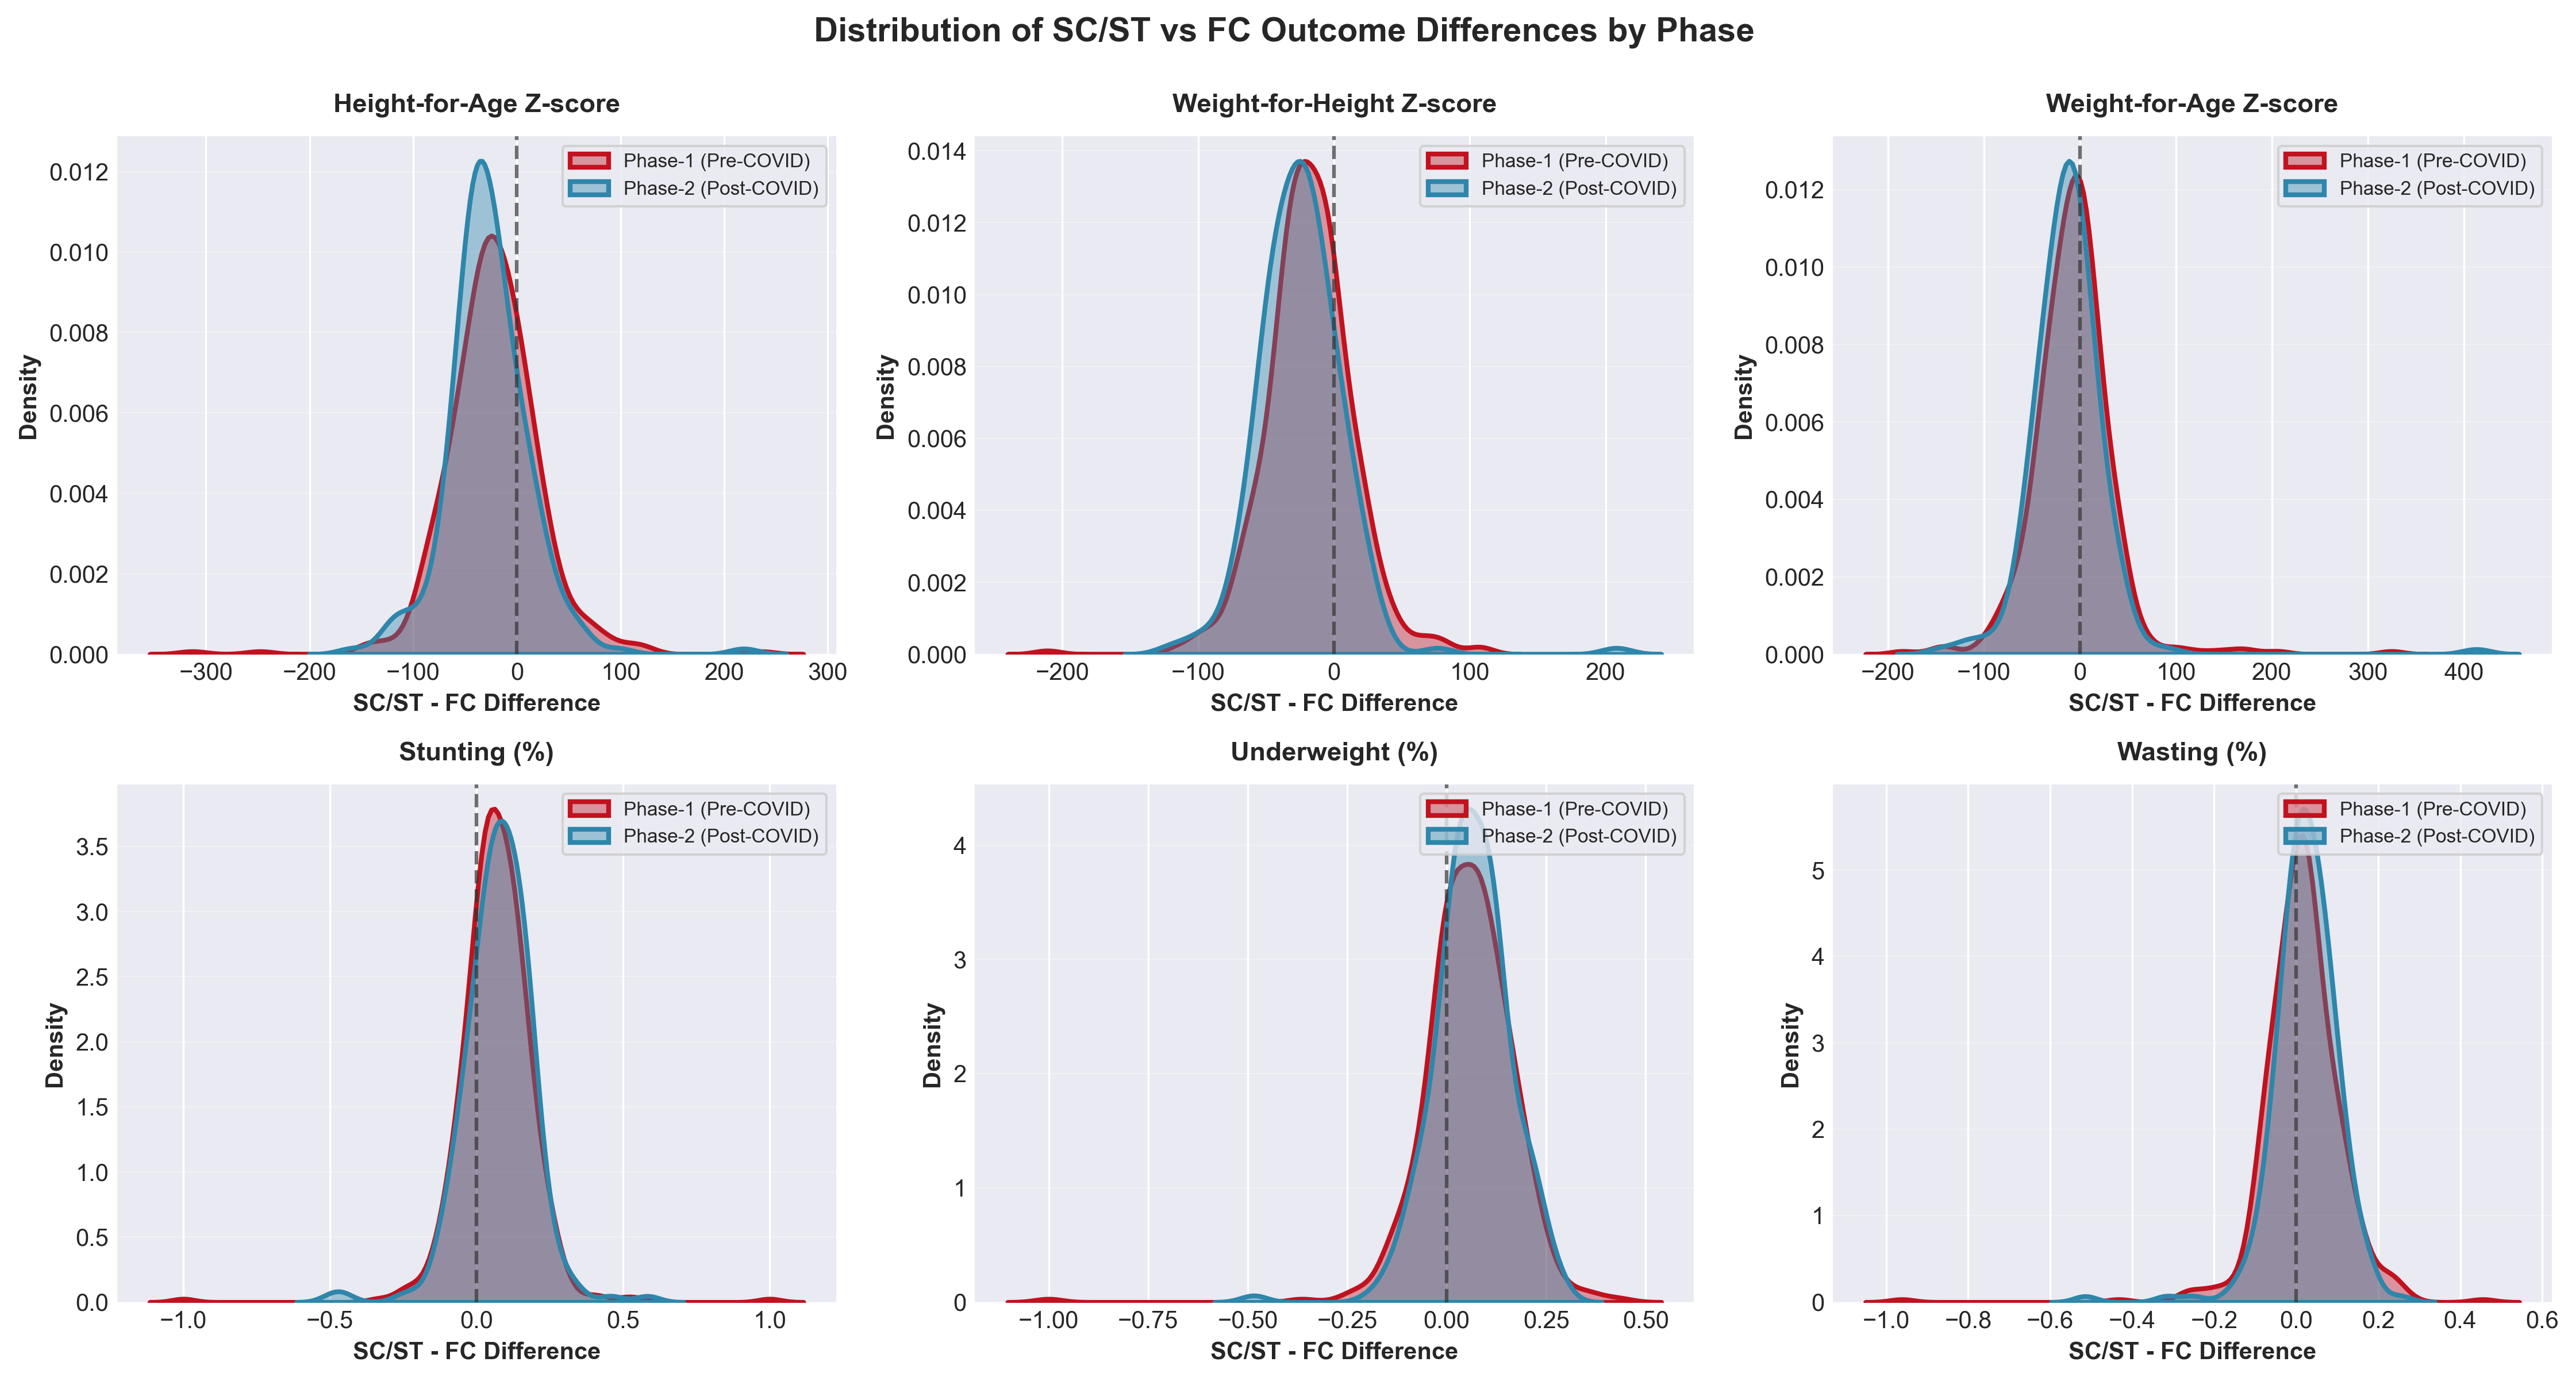

In [ ]:
# PLOT OUTCOME DIFFERENCES BETWEEN PHASE-1 AND PHASE-2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define outcomes
outcomes = [
    ('scst_hw70_mean', 'fc_hw70_mean', 'Height-for-Age Z-score'),
    ('scst_hw71_mean', 'fc_hw71_mean', 'Weight-for-Height Z-score'),
    ('scst_hw72_mean', 'fc_hw72_mean', 'Weight-for-Age Z-score'),
    ('scst_stunting_pct', 'fc_stunting_pct', 'Stunting (%)'),
    ('scst_underweight_pct', 'fc_underweight_pct', 'Underweight (%)'),
    ('scst_wasting_pct', 'fc_wasting_pct', 'Wasting (%)')
]

# Create figure with 2 rows x 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, (scst_col, fc_col, title) in enumerate(outcomes):
    ax = axes[idx]
    
    # Calculate difference
    agg_df['diff'] = agg_df[scst_col] - agg_df[fc_col]
    
    # Split by phase
    phase1_data = agg_df[agg_df['phase'] == 1]['diff'].dropna()
    phase2_data = agg_df[agg_df['phase'] == 2]['diff'].dropna()
    
    # Plot KDE
    if len(phase1_data) > 1:
        sns.kdeplot(data=phase1_data, ax=ax, color='#C1121F', fill=True, alpha=0.4, 
                    label='Phase-1 (Pre-COVID)', linewidth=2)
    if len(phase2_data) > 1:
        sns.kdeplot(data=phase2_data, ax=ax, color='#2E86AB', fill=True, alpha=0.4, 
                    label='Phase-2 (Post-COVID)', linewidth=2)
    
    # Add vertical line at 0
    ax.axvline(x=0, color='#333333', linestyle='--', linewidth=1.5, alpha=0.7)
    
    # Customize
    ax.set_xlabel('SC/ST - FC Difference', fontsize=10, fontweight='bold')
    ax.set_ylabel('Density', fontsize=10, fontweight='bold')
    ax.set_title(title, fontsize=11, fontweight='bold', pad=10)
    ax.legend(loc='upper right', fontsize=8, frameon=True, fancybox=True)
    
    # Style improvements
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)

plt.suptitle('Distribution of SC/ST vs FC Outcome Differences by Phase', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### Merging Census Data

In [3]:
import pandas as pd

In [4]:
agg_df = pd.read_csv("aggreg_data_child_v3.csv")

In [5]:
census_df = pd.read_csv("india-districts-census-2011.csv")
census_df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [6]:
census_df['State name'] = census_df['State name'].str.lower()
census_df['Literate_Prop'] = census_df['Literate']/ census_df['Population'] 
census_df['SCST_Prop'] = (census_df['SC'] + census_df['ST']) / census_df['Population']
census_df.head(10)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity,Literate_Prop,SCST_Prop
0,1,jammu and kashmir,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,71,101,172,74,10,84,15,1119,0.505144,0.082036
1,2,jammu and kashmir,Badgam,753745,398041,355704,335649,207741,127908,368,...,72,89,161,96,28,124,18,1066,0.445308,0.032212
2,3,jammu and kashmir,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,15,22,37,20,14,34,17,242,0.702465,0.721756
3,4,jammu and kashmir,Kargil,140802,77785,63017,86236,56301,29935,18,...,12,18,30,19,3,22,7,214,0.612463,0.868979
4,5,jammu and kashmir,Punch,476835,251899,224936,261724,163333,98391,556,...,35,50,85,59,8,67,12,629,0.548877,0.370478
5,6,jammu and kashmir,Rajouri,642415,345351,297064,364109,224469,139640,48157,...,42,58,100,72,22,94,15,786,0.566782,0.437368
6,7,jammu and kashmir,Kathua,616435,326109,290326,389204,228499,160705,141224,...,54,69,123,78,52,130,28,936,0.631379,0.315574
7,8,jammu and kashmir,Baramula,1008039,534733,473306,545149,337170,207979,1476,...,155,190,345,177,78,255,64,2100,0.540801,0.038869
8,9,jammu and kashmir,Bandipore,392232,207680,184552,185979,117058,68921,392,...,2,2,4,3,3,6,0,45,0.474156,0.193166
9,10,jammu and kashmir,Srinagar,1236829,651124,585705,748584,431746,316838,1068,...,319,380,699,240,370,610,445,3099,0.605245,0.008088


In [8]:
from rapidfuzz import process, fuzz
import pandas as pd

# Unique state names in lowercase
agg_states = agg_df['state_name'].dropna().str.lower().unique()
census_states = census_df['State name'].dropna().str.lower().unique()

# Create a mapping dictionary
mapping = {}

for state in agg_states:
    # Find the best match in gdf_states
    match, score, _ = process.extractOne(state, census_states, scorer=fuzz.token_sort_ratio)
    
    # If exact match, skip
    if state != match:
        mapping[state] = match

# Convert mapping to DataFrame for inspection
mapping_df = pd.DataFrame(list(mapping.items()), columns=['agg_state_name', 'census_state_name'])
mapping_df

,agg_state_name,census_state_name
0,dadra & nagar haveli and daman & diu,dadra and nagar haveli
1,jammu & kashmir,jammu and kashmir
2,odisha,orissa
3,puducherry,pondicherry
4,telangana,haryana


In [9]:
state_substitution_dict = {
    'dadar & nagar haveli and daman & diu': 'dadra and nagar haveli',
    'odisha': 'orissa',
    'puducherry': 'pondicherry',
    'jammu & kashmir': 'jammu and kashmir',
}

# Replace state names in agg_df
agg_df['state_name'] = agg_df['state_name'].replace(state_substitution_dict)

# Verify the replacements worked
print("State names after replacement:")
print(agg_df['state_name'].unique())

State names after replacement:
['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'chandigarh'
 'chhattisgarh' 'dadra & nagar haveli and daman & diu' 'gujarat' 'haryana'
 'himachal pradesh' 'jammu and kashmir' 'jharkhand' 'karnataka' 'kerala'
 'madhya pradesh' 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland'
 'nct of delhi' 'orissa' 'pondicherry' 'punjab' 'rajasthan' 'sikkim'
 'tamil nadu' 'telangana' 'tripura' 'uttar pradesh' 'uttarakhand'
 'west bengal']


In [10]:
print(agg_df['state_name'].unique())

['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'chandigarh'
 'chhattisgarh' 'dadra & nagar haveli and daman & diu' 'gujarat' 'haryana'
 'himachal pradesh' 'jammu and kashmir' 'jharkhand' 'karnataka' 'kerala'
 'madhya pradesh' 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland'
 'nct of delhi' 'orissa' 'pondicherry' 'punjab' 'rajasthan' 'sikkim'
 'tamil nadu' 'telangana' 'tripura' 'uttar pradesh' 'uttarakhand'
 'west bengal']


In [11]:
agg_df[agg_df['state_name'] == 'sikkim']

,Unnamed: 0,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,...,Confirmed_2021-01,Confirmed_2021-02,Confirmed_2021-03,Confirmed_2021-04,Confirmed_2021-05,Confirmed_2021-06,Confirmed_2021-07,Confirmed_2021-08,Confirmed_2021-09,Confirmed_2021-10
446,446,sikkim_unknown,sikkim,unknown,1,8,2019,13,31,0.439707,...,186536.0,171324.0,191924.0,201721.0,355921.0,554358.0,722627.0,887107.0,922525.0,984136.0
447,447,sikkim_unknown,sikkim,unknown,1,10,2019,22,19,0.825771,...,186536.0,171324.0,191924.0,201721.0,355921.0,554358.0,722627.0,887107.0,922525.0,984136.0
448,448,sikkim_unknown,sikkim,unknown,1,12,2019,11,54,0.778270,...,186536.0,171324.0,191924.0,201721.0,355921.0,554358.0,722627.0,887107.0,922525.0,984136.0
449,449,sikkim_unknown,sikkim,unknown,1,12,2019,32,30,1.000000,...,186536.0,171324.0,191924.0,201721.0,355921.0,554358.0,722627.0,887107.0,922525.0,984136.0


In [16]:
# BEFORE WE HAD IDENTIFIED THAT 
# STATES WITH ISSUES IN COVID DATA: ANDAMAN, SIKKIM, ASSAM (only few district names specified), MANIPUR (only few district names specified), 
# DELHI (the different districts are not differentiated), TELANGANA (no district data at all), 

states_to_drop = ['delhi', 'sikkim', 'telangana', 'assam', 'dadra & nagar haveli and daman & diu']  # update this list

agg_df = agg_df[~agg_df['state_name'].str.lower().isin(states_to_drop)].copy()

In [17]:
census_df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity,Literate_Prop,SCST_Prop,state_lower,district_lower
0,1,jammu and kashmir,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,172,74,10,84,15,1119,0.505144,0.082036,jammu and kashmir,kupwara
1,2,jammu and kashmir,Badgam,753745,398041,355704,335649,207741,127908,368,...,161,96,28,124,18,1066,0.445308,0.032212,jammu and kashmir,badgam
2,3,jammu and kashmir,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,37,20,14,34,17,242,0.702465,0.721756,jammu and kashmir,leh(ladakh)
3,4,jammu and kashmir,Kargil,140802,77785,63017,86236,56301,29935,18,...,30,19,3,22,7,214,0.612463,0.868979,jammu and kashmir,kargil
4,5,jammu and kashmir,Punch,476835,251899,224936,261724,163333,98391,556,...,85,59,8,67,12,629,0.548877,0.370478,jammu and kashmir,punch


In [ ]:
import pandas as pd
from rapidfuzz import process, fuzz

# Make lowercase copies to improve matching
agg_df['state_lower'] = agg_df['state_name'].str.lower().str.strip()
agg_df['district_lower'] = agg_df['district_name'].str.lower().str.strip()
census_df['state_lower'] = census_df['State name'].str.lower().str.strip()
census_df['district_lower'] = census_df['District name'].str.lower().str.strip()

results = []

# Iterate over each state in agg_df
for state in agg_df['state_lower'].unique():
    # Get districts in this state from agg_df
    agg_districts = agg_df.loc[agg_df['state_lower'] == state, 'district_lower'].unique()
    
    # Get districts in this state from census_df
    census_districts = census_df.loc[census_df['state_lower'] == state, 'district_lower'].unique()

    print(state, census_districts)
        
    for district in agg_districts:
        # Skip if exact match exists
        if district in census_districts:
            continue
        
        # Fuzzy match within the same state
        match, score, _ = process.extractOne(district, census_districts, scorer=fuzz.token_sort_ratio)
        
        # Keep only non-100 matches
        if score < 100:
            results.append({
                'state': state,
                'agg_district_name': district,
                'closest_census_district_name': match,
                'score': score
            })

# Convert results to DataFrame
fuzzy_matches_df = pd.DataFrame(results)

# Write to CSV
fuzzy_matches_df.to_csv("district_fuzzy_matches_2.csv", index=False)

print(f"Saved {len(fuzzy_matches_df)} fuzzy district matches to CSV.")

In [19]:
for district in census_df[census_df['state_lower'] == 'west bengal']['district_lower'].unique():
    print(district)

darjiling
jalpaiguri
koch bihar
uttar dinajpur
dakshin dinajpur
maldah
murshidabad
birbhum
barddhaman
nadia
north twenty four parganas
hugli
bankura
puruliya
haora
kolkata
south twenty four parganas
paschim medinipur
purba medinipur


In [20]:
census_df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity,Literate_Prop,SCST_Prop,state_lower,district_lower
0,1,jammu and kashmir,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,172,74,10,84,15,1119,0.505144,0.082036,jammu and kashmir,kupwara
1,2,jammu and kashmir,Badgam,753745,398041,355704,335649,207741,127908,368,...,161,96,28,124,18,1066,0.445308,0.032212,jammu and kashmir,badgam
2,3,jammu and kashmir,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,37,20,14,34,17,242,0.702465,0.721756,jammu and kashmir,leh(ladakh)
3,4,jammu and kashmir,Kargil,140802,77785,63017,86236,56301,29935,18,...,30,19,3,22,7,214,0.612463,0.868979,jammu and kashmir,kargil
4,5,jammu and kashmir,Punch,476835,251899,224936,261724,163333,98391,556,...,85,59,8,67,12,629,0.548877,0.370478,jammu and kashmir,punch


In [ ]:
## THIS CLEANS UP THE DISTRICT LEVEL DATA

import pandas as pd

# 1. Load the fuzzy match file
fm = pd.read_csv("district_fuzzy_matches_2_edited.csv")

# 2. Build dictionary from fuzzy matches
district_map = dict(
    zip(
        fm["agg_district_name"].str.lower().str.strip(),
        fm["closest_census_district_name"].str.lower().str.strip()
    )
)

# 5. Apply fuzzy district mapping to agg_df
agg_df["matched_census_district"] = agg_df["district_lower"].apply(
    lambda x: district_map.get(x, x)
)


# 6. Prepare merge keys
agg_df["merge_state"] = agg_df["state_lower"]
agg_df["merge_district"] = agg_df["matched_census_district"]

census_df["merge_state"] = census_df["state_lower"]
census_df["merge_district"] = census_df["district_lower"]

# 7. Merge
merged = agg_df.merge(
    census_df[["merge_state", "merge_district", "Literate_Prop", "SCST_Prop", "Population"]],
    on=["merge_state", "merge_district"],
    how="left"
)

merged.head()


,Unnamed: 0,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,...,Confirmed_2021-09,Confirmed_2021-10,state_lower,district_lower,matched_census_district,merge_state,merge_district,Literate_Prop,SCST_Prop,Population
0,0,andhra pradesh_anantapur,andhra pradesh,anantapur,1,10,2019,58,119,0.715638,...,4722575.0,4889653.0,andhra pradesh,anantapur,anantapur,andhra pradesh,anantapur,0.566252,0.180651,4081148.0
1,1,andhra pradesh_chittoor,andhra pradesh,chittoor,1,9,2019,84,99,0.808412,...,7238130.0,7614862.0,andhra pradesh,chittoor,chittoor,andhra pradesh,chittoor,0.639156,0.226380,4174064.0
2,2,andhra pradesh_east godavari,andhra pradesh,east godavari,1,7,2019,19,116,0.709104,...,8657651.0,9075399.0,andhra pradesh,east godavari,east godavari,andhra pradesh,east godavari,0.638026,0.224757,5154296.0
3,3,andhra pradesh_guntur,andhra pradesh,guntur,1,8,2019,22,74,0.664623,...,5230624.0,5493555.0,andhra pradesh,guntur,guntur,andhra pradesh,guntur,0.605678,0.246428,4887813.0
4,4,andhra pradesh_krishna,andhra pradesh,krishna,1,8,2019,28,92,0.630143,...,3473700.0,3672438.0,andhra pradesh,krishna,krishna,andhra pradesh,krishna,0.666250,0.222147,4517398.0


In [23]:
final_df = merged.drop(['state_lower', 'Unnamed: 0', 'State','District', 'district_lower', 'matched_census_district', 'merge_state', 'merge_district'], axis = 1)
final_df['population_scaled'] = 1.2 * final_df['Population'] 
final_df.head(20)

,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,pct_urban,...,Confirmed_2021-05,Confirmed_2021-06,Confirmed_2021-07,Confirmed_2021-08,Confirmed_2021-09,Confirmed_2021-10,Literate_Prop,SCST_Prop,Population,population_scaled
0,andhra pradesh_anantapur,andhra pradesh,anantapur,1,10,2019,58,119,0.715638,0.284362,...,3500097.0,4474983.0,4815673.0,4859913.0,4722575.0,4889653.0,0.566252,0.180651,4081148.0,4897377.6
1,andhra pradesh_chittoor,andhra pradesh,chittoor,1,9,2019,84,99,0.808412,0.191588,...,4864235.0,6267293.0,7009075.0,7286627.0,7238130.0,7614862.0,0.639156,0.226380,4174064.0,5008876.8
2,andhra pradesh_east godavari,andhra pradesh,east godavari,1,7,2019,19,116,0.709104,0.290896,...,5710600.0,7469018.0,8418968.0,8753094.0,8657651.0,9075399.0,0.638026,0.224757,5154296.0,6185155.2
3,andhra pradesh_guntur,andhra pradesh,guntur,1,8,2019,22,74,0.664623,0.335377,...,4066211.0,4725976.0,5132384.0,5287548.0,5230624.0,5493555.0,0.605678,0.246428,4887813.0,5865375.6
4,andhra pradesh_krishna,andhra pradesh,krishna,1,8,2019,28,92,0.630143,0.369857,...,2359597.0,2889819.0,3263822.0,3462850.0,3473700.0,3672438.0,0.666250,0.222147,4517398.0,5420877.6
5,andhra pradesh_kurnool,andhra pradesh,kurnool,1,10,2019,40,139,0.823835,0.176165,...,3085403.0,3587989.0,3804496.0,3831032.0,3718166.0,3846521.0,0.524776,0.202488,4053463.0,4864155.6
6,andhra pradesh_prakasam,andhra pradesh,prakasam,1,9,2019,22,97,0.727592,0.272408,...,2826418.0,3466650.0,3902714.0,4089844.0,4065736.0,4281112.0,0.560549,0.276386,3397448.0,4076937.6
7,andhra pradesh_s.p.s. nellore,andhra pradesh,s.p.s. nellore,1,9,2019,91,94,0.763665,0.236335,...,3161946.0,3711749.0,4059174.0,4265058.0,4286955.0,4522678.0,0.618240,0.321433,2963557.0,3556268.4
8,andhra pradesh_srikakulam,andhra pradesh,srikakulam,1,8,2019,13,117,0.729104,0.270896,...,2885234.0,3446701.0,3711870.0,3763397.0,3673500.0,3809314.0,0.553207,0.156036,2703114.0,3243736.8
9,andhra pradesh_visakhapatnam,andhra pradesh,visakhapatnam,1,7,2019,40,101,0.554604,0.445396,...,3458412.0,4347840.0,4670613.0,4768382.0,4677434.0,4874120.0,0.598577,0.220945,4290589.0,5148706.8


In [ ]:
#  THIS BLOCK RECALCULATES THE PHASE USING THE SIMPLE RULE
#  phase 1 if year < 2020 OR year == 2020 and month <= 3
is_phase1 = (
    (final_df['survey_year'] < 2020) |
    ((final_df['survey_year'] == 2020) & (final_df['survey_month'] <= 3))
)

# map: True -> 1 (phase1), False -> 2 (phase2)
final_df['phase'] = is_phase1.astype(int).replace({1: 1, 0: 2})

In [27]:
import pandas as pd

# 1️⃣ Identify the Confirmed columns
confirmed_cols = [c for c in final_df.columns if c.startswith("Confirmed_")]

# 2️⃣ Function to get covid_dosage for each row
def get_covid_dosage(row):
    month = row["survey_month"]
    year = row["survey_year"]
    col_name = f"Confirmed_{year}-{str(month).zfill(2)}"  # e.g., Confirmed_2020-04
    if col_name in final_df.columns:
        cases = row[col_name]
        if cases > 0:
            return cases / row["population_scaled"]
    return 0.0

# 3️⃣ Apply function to create covid_dosage
final_df["covid_dosage"] = final_df.apply(get_covid_dosage, axis=1)

# 4️⃣ Drop all Confirmed columns
final_df = final_df.drop(columns=confirmed_cols)

final_df.head()


,state_district,state_name,district_name,phase,survey_month,survey_year,scst_count,fc_count,pct_rural,pct_urban,...,fc_stunting_pct,scst_underweight_pct,fc_underweight_pct,scst_wasting_pct,fc_wasting_pct,Literate_Prop,SCST_Prop,Population,population_scaled,covid_dosage
0,andhra pradesh_anantapur,andhra pradesh,anantapur,1,10,2019,58,119,0.715638,0.284362,...,0.364716,0.483565,0.377471,0.196905,0.170152,0.566252,0.180651,4081148.0,4897377.6,0.0
1,andhra pradesh_chittoor,andhra pradesh,chittoor,1,9,2019,84,99,0.808412,0.191588,...,0.204724,0.358084,0.217545,0.181030,0.094930,0.639156,0.226380,4174064.0,5008876.8,0.0
2,andhra pradesh_east godavari,andhra pradesh,east godavari,1,7,2019,19,116,0.709104,0.290896,...,0.173558,0.406912,0.182651,0.101399,0.150020,0.638026,0.224757,5154296.0,6185155.2,0.0
3,andhra pradesh_guntur,andhra pradesh,guntur,1,8,2019,22,74,0.664623,0.335377,...,0.262750,0.127676,0.264472,0.124325,0.178033,0.605678,0.246428,4887813.0,5865375.6,0.0
4,andhra pradesh_krishna,andhra pradesh,krishna,1,8,2019,28,92,0.630143,0.369857,...,0.269729,0.253952,0.184660,0.070957,0.147881,0.666250,0.222147,4517398.0,5420877.6,0.0


In [28]:
final_df.to_csv("final_merged_dataframe_v2.csv", index = False)

In [32]:
len(final_df[final_df['covid_dosage'] > 0])

207

In [33]:
len(final_df)

576

In [34]:
final_df = final_df.dropna()
final_df.to_csv("final_merged_dataframe_v2.csv")

### Proper Method v0.1 

In [35]:
import pandas as pd

In [36]:
final_df = pd.read_csv("final_merged_dataframe_v2.csv")
final_df = final_df.dropna()

# Create malnutrition gaps
final_df["stunting_gap"] = final_df["scst_stunting_pct"] - final_df["fc_stunting_pct"]
final_df["wasting_gap"] = final_df["scst_wasting_pct"] - final_df["fc_wasting_pct"]
final_df["underweight_gap"] = final_df["scst_underweight_pct"] - final_df["fc_underweight_pct"]

final_df["hw70_gap"] = final_df["scst_hw70_mean"] - final_df["fc_hw70_mean"]
final_df["hw71_gap"] = final_df["scst_hw71_mean"] - final_df["fc_hw71_mean"]
final_df["hw72_gap"] = final_df["scst_hw72_mean"] - final_df["fc_hw72_mean"]

In [37]:
# phase 1 if year < 2020 OR year == 2020 and month <= 3
is_phase1 = (
    (final_df['survey_year'] < 2020) |
    ((final_df['survey_year'] == 2020) & (final_df['survey_month'] <= 3))
)

# map: True -> 1 (phase1), False -> 2 (phase2)
final_df['phase'] = is_phase1.astype(int).replace({1: 1, 0: 2})

In [38]:
#final_df.to_csv("final_merged_dataframe.csv")

In [39]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# ============================================================================
# STEP 1: MATCH PHASE 1 TO PHASE 2 (ALL PHASE 2)
# ============================================================================

# Prepare matching covariates
matching_vars = ['pct_urban', 'SCST_Prop', 'Literate_Prop', 'population_scaled']

# Separate phases
phase1_df = final_df[final_df['phase'] == 1].copy()
phase2_df = final_df[final_df['phase'] == 2].copy()

# Standardize covariates
scaler = StandardScaler()
X_phase1 = scaler.fit_transform(phase1_df[matching_vars])
X_phase2 = scaler.transform(phase2_df[matching_vars])

# Nearest neighbor matching (1:1 with replacement)
# Each Phase 2 district gets matched to closest Phase 1 district
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(X_phase1)

distances, indices = nn.kneighbors(X_phase2)

# Store matches
phase2_df['matched_phase1_idx'] = phase1_df.iloc[indices.flatten()].index
phase2_df['match_distance'] = distances.flatten()

# Check match quality
print("Match distance statistics:")
print(phase2_df['match_distance'].describe())

# Flag poor matches (distance > threshold)
threshold = phase2_df['match_distance'].quantile(0.90)  # Drop worst 10%
phase2_df['good_match'] = phase2_df['match_distance'] <= threshold

print(f"\nGood matches: {phase2_df['good_match'].sum()} / {len(phase2_df)}")

# ============================================================================
# STEP 2: CREATE MATCHED PANEL STRUCTURE
# ============================================================================

# For each Phase 2 district, get its Phase 1 match
matched_pairs = []

for idx, row in phase2_df.iterrows():
    if row['good_match']:
        # Phase 1 match
        phase1_match = phase1_df.loc[row['matched_phase1_idx']]
        
        matched_pairs.append({
            'pair_id': idx,
            'district_name': row['district_name'],
            'state_name': row['state_name'],
            'phase': 1,
            'covid_dosage': 0,
            'stunting_gap': phase1_match['stunting_gap'],
            'wasting_gap': phase1_match['wasting_gap'],
            'underweight_gap': phase1_match['underweight_gap'],
            'hw70_gap': phase1_match['hw70_gap'],
            'hw71_gap': phase1_match['hw71_gap'],
            'hw72_gap': phase1_match['hw72_gap'],
            'pct_urban': phase1_match['pct_urban'],
            'SCST_Prop': phase1_match['SCST_Prop'],
            'Literate_Prop': phase1_match['Literate_Prop'],
            'population_scaled': phase1_match['population_scaled'],
            'survey_year': phase1_match['survey_year'],
            'survey_month': phase1_match['survey_month']
        })
        
        # Phase 2 actual
        matched_pairs.append({
            'pair_id': idx,
            'district_name': row['district_name'],
            'state_name': row['state_name'],
            'phase': 2,
            'covid_dosage': row['covid_dosage'],
            'stunting_gap': row['stunting_gap'],
            'wasting_gap': row['wasting_gap'],
            'underweight_gap': row['underweight_gap'],
            'hw70_gap': row['hw70_gap'],
            'hw71_gap': row['hw71_gap'],
            'hw72_gap': row['hw72_gap'],
            'pct_urban': row['pct_urban'],
            'SCST_Prop': row['SCST_Prop'],
            'Literate_Prop': row['Literate_Prop'],
            'population_scaled': row['population_scaled'],
            'survey_year': row['survey_year'],
            'survey_month': row['survey_month']
        })

matched_df = pd.DataFrame(matched_pairs)

print(f"\nMatched sample size: {len(matched_df)} observations ({len(matched_df)//2} pairs)")

Match distance statistics:
count    207.000000
mean       0.449062
std        0.262416
min        0.052061
25%        0.290638
50%        0.368494
75%        0.529243
max        1.909946
Name: match_distance, dtype: float64

Good matches: 186 / 207

Matched sample size: 372 observations (186 pairs)


In [40]:
# ============================================================================ 
# COMPUTE STANDARDIZED MEAN DIFFERENCES (SMDs) BEFORE & AFTER MATCHING
# ============================================================================

# Function to compute SMD
def compute_smd(x_treat, x_control):
    mean_diff = x_treat.mean() - x_control.mean()
    pooled_sd = np.sqrt((x_treat.var() + x_control.var()) / 2)
    return 0 if pooled_sd == 0 else mean_diff / pooled_sd

# SMD BEFORE matching (Phase 2 vs Phase 1)
smd_before = {var: compute_smd(phase2_df[var], phase1_df[var]) for var in matching_vars}

# SMD AFTER matching (matched Phase 2 vs matched Phase 1)
matched_treat = matched_df[matched_df['phase'] == 2]
matched_ctrl = matched_df[matched_df['phase'] == 1]
smd_after = {var: compute_smd(matched_treat[var], matched_ctrl[var]) for var in matching_vars}


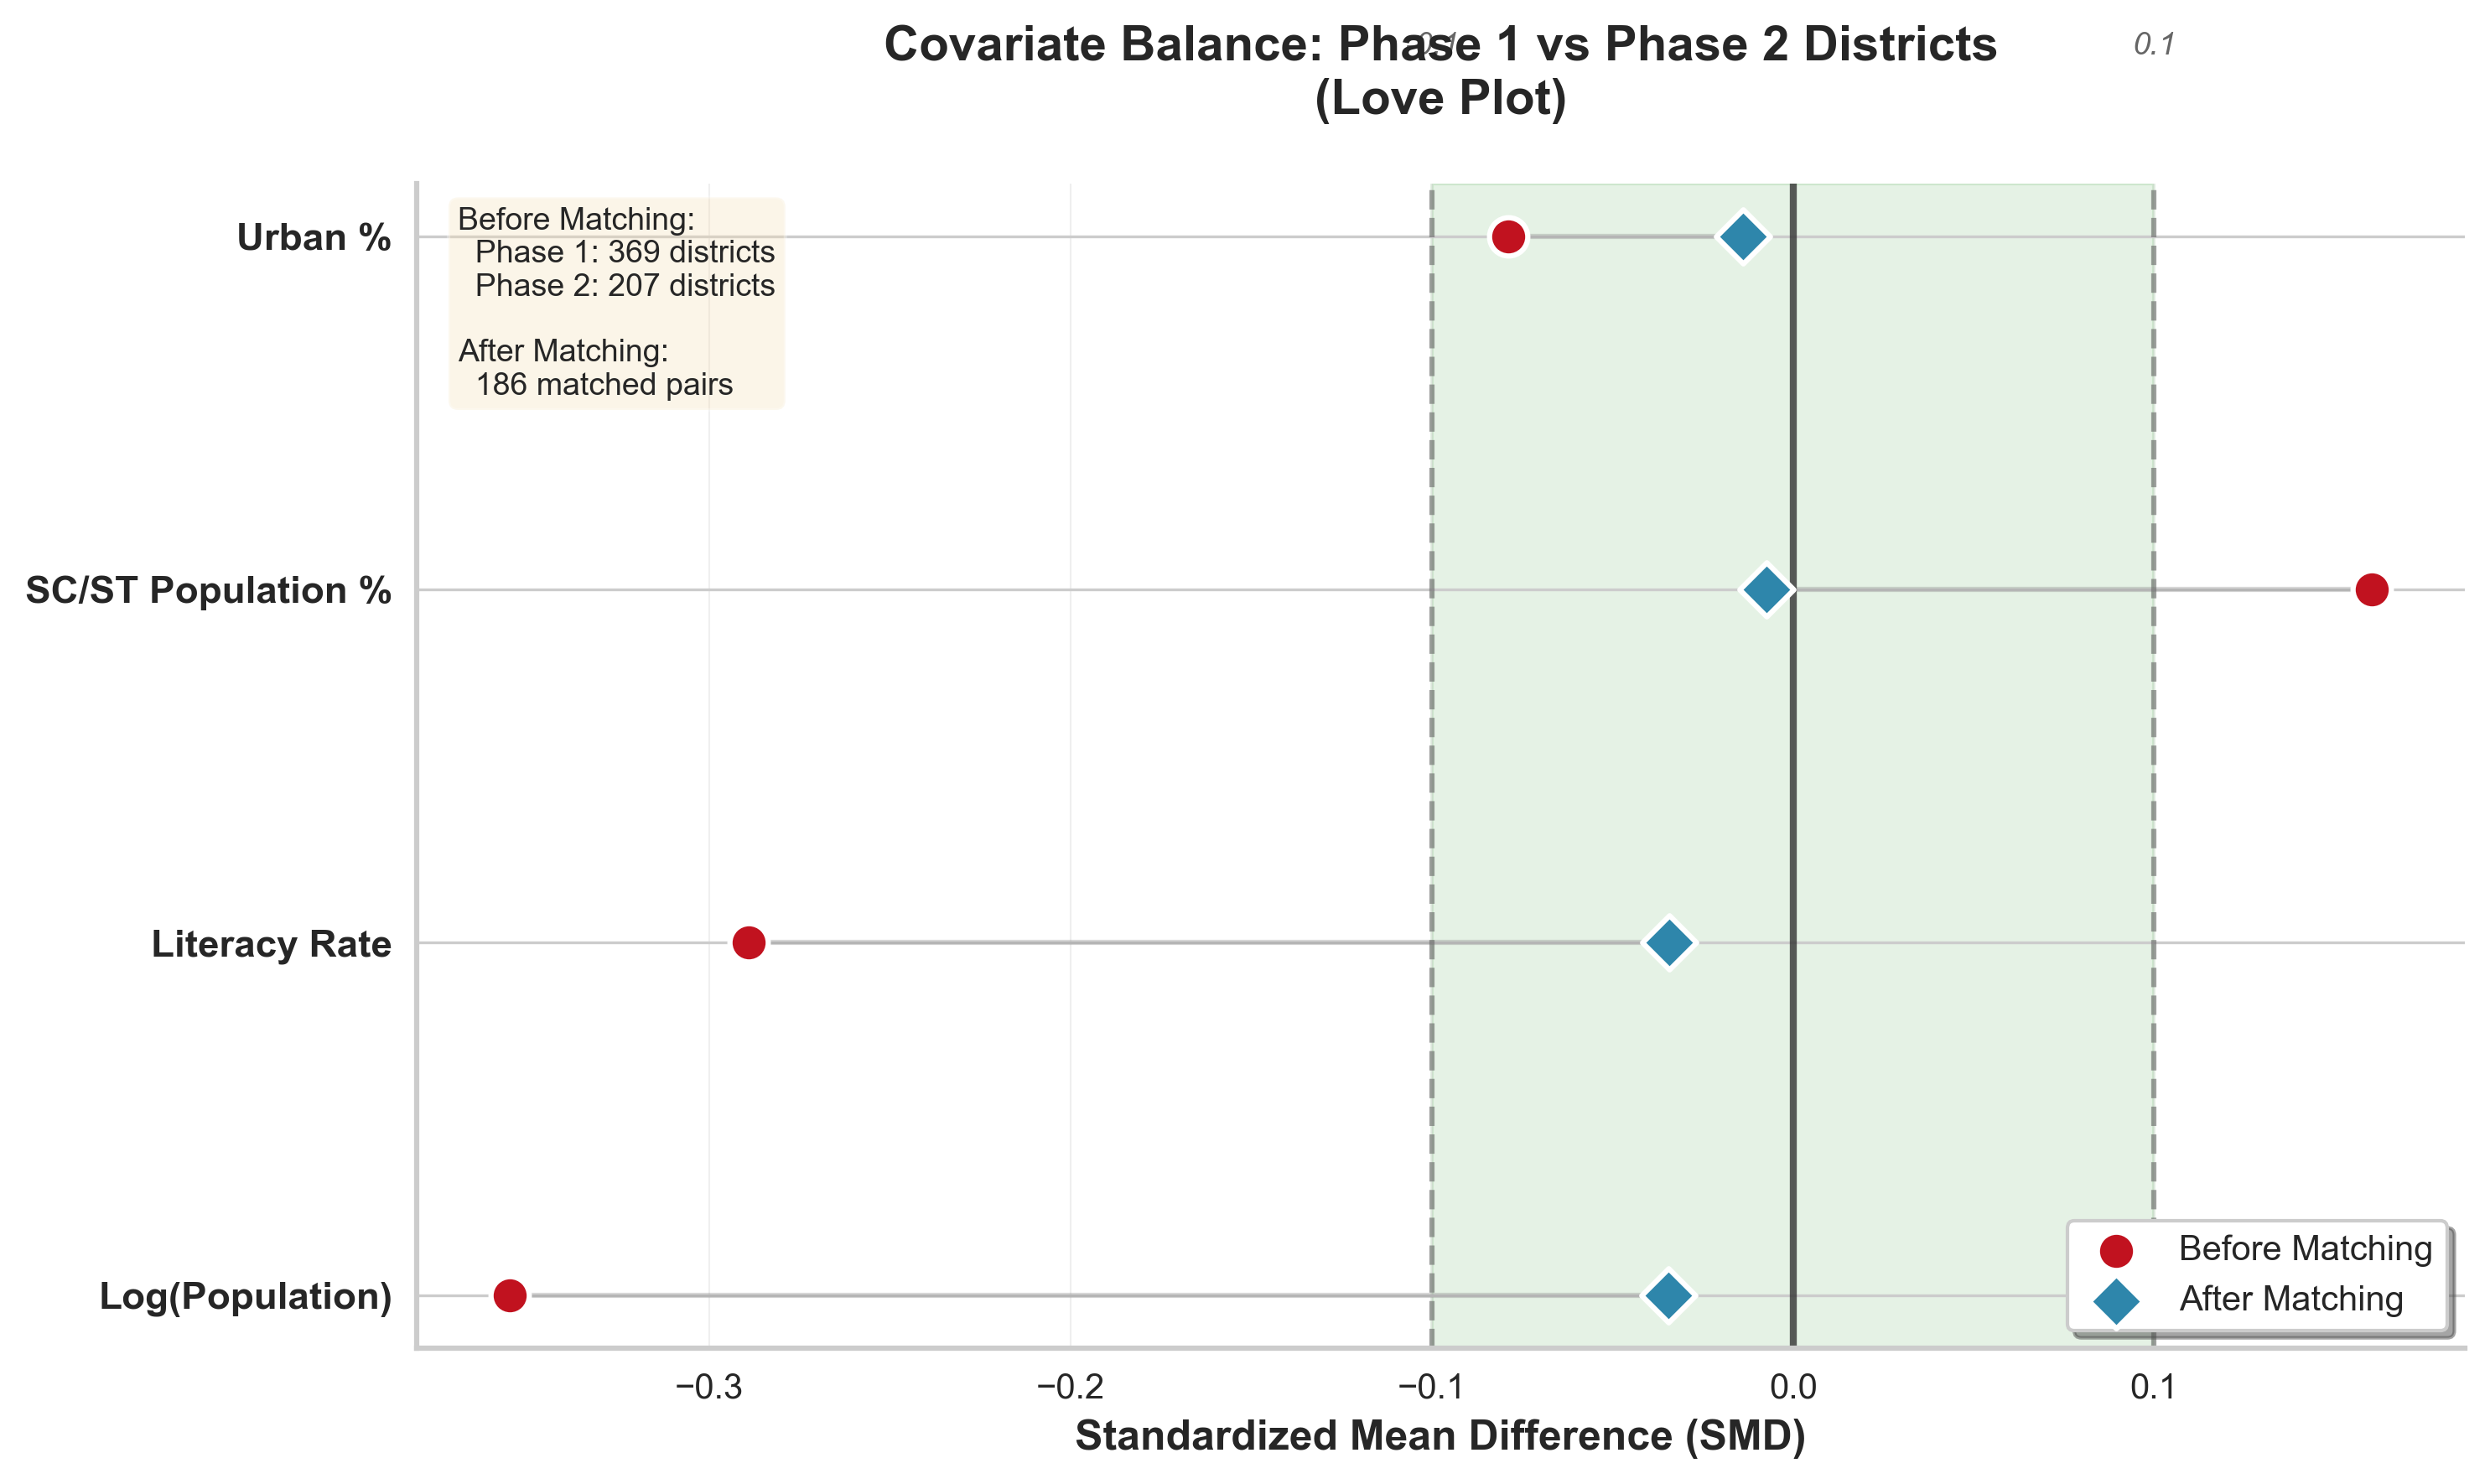


DETAILED BALANCE ASSESSMENT

Log(Population):
  SMD Before:  -0.355  ⚠️ IMBALANCED
  SMD After:   -0.034  ✅ Balanced
  Improvement:  0.321  ✅

Literacy Rate:
  SMD Before:  -0.289  ⚠️ IMBALANCED
  SMD After:   -0.034  ✅ Balanced
  Improvement:  0.255  ✅

SC/ST Population %:
  SMD Before:   0.160  ⚠️ IMBALANCED
  SMD After:   -0.007  ✅ Balanced
  Improvement:  0.153  ✅

Urban %:
  SMD Before:  -0.079  ✅ Balanced
  SMD After:   -0.014  ✅ Balanced
  Improvement:  0.065  ✅


Maximum absolute SMD:
  Before matching: 0.355
  After matching:  0.034

Covariates with |SMD| < 0.1:
  Before: 1 / 4
  After:  4 / 4

✅ SUCCESS: All covariates balanced after matching!


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300


# ============================================================================
# PLOT 2: LOVE PLOT (COVARIATE BALANCE)
# ============================================================================

# Prepare data for plotting
covariate_labels = {
    'pct_urban': 'Urban %',
    'SCST_Prop': 'SC/ST Population %',
    'Literate_Prop': 'Literacy Rate',
    'population_scaled': 'Log(Population)'
}

balance_df = pd.DataFrame({
    'covariate': [covariate_labels.get(var, var) for var in matching_vars],
    'SMD_before': [smd_before[var] for var in matching_vars],
    'SMD_after': [smd_after[var] for var in matching_vars]
})

# Sort by absolute SMD before (largest imbalance first)
balance_df = balance_df.sort_values('SMD_before', key=lambda x: np.abs(x), 
                                    ascending=False)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(balance_df))

# Plot points
ax.scatter(balance_df['SMD_before'], y_pos, 
           label='Before Matching', s=120, 
           color='#C1121F', marker='o', alpha=1,
           edgecolors='white', linewidth=1.5, zorder=3)

ax.scatter(balance_df['SMD_after'], y_pos, 
           label='After Matching', s=120,
           color='#2E86AB', marker='D', alpha=1,
           edgecolors='white', linewidth=1.5, zorder=3)

# Connect before/after with lines
for i, (before, after) in enumerate(zip(balance_df['SMD_before'], 
                                        balance_df['SMD_after'])):
    ax.plot([before, after], [i, i], 
            color='gray', alpha=0.3, linewidth=1.5, zorder=1)

# Reference lines
ax.axvline(0, color='#333333', linewidth=2, alpha=0.8, zorder=2)
ax.axvline(0.1, color='#666666', linestyle='--', linewidth=1.5, alpha=0.6, zorder=2)
ax.axvline(-0.1, color='#666666', linestyle='--', linewidth=1.5, alpha=0.6, zorder=2)

# Add text labels for thresholds
ax.text(0.1, len(balance_df) - 0.5, '0.1', ha='center', va='bottom', 
        fontsize=9, color='#666666', style='italic')
ax.text(-0.1, len(balance_df) - 0.5, '-0.1', ha='center', va='bottom', 
        fontsize=9, color='#666666', style='italic')

# Shaded region for good balance
ax.axvspan(-0.1, 0.1, alpha=0.1, color='green', zorder=0)

# Customize axes
ax.set_yticks(y_pos)
ax.set_yticklabels(balance_df['covariate'], fontsize=11, fontweight='bold')
ax.set_xlabel("Standardized Mean Difference (SMD)", fontsize=12, fontweight='bold')
ax.set_title("Covariate Balance: Phase 1 vs Phase 2 Districts\n(Love Plot)", 
             fontsize=14, fontweight='bold', pad=20)

# Legend
ax.legend(loc='lower right', frameon=True, fancybox=True, 
          shadow=True, fontsize=10)

# Grid
ax.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add sample sizes in text box
n_phase1 = len(phase1_df)
n_phase2_before = len(phase2_df)
n_pairs = len(matched_df) // 2

textstr = f'Before Matching:\n  Phase 1: {n_phase1} districts\n  Phase 2: {n_phase2_before} districts\n\n' \
          f'After Matching:\n  {n_pairs} matched pairs'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('love_plot_phase_matching.png', dpi=300, bbox_inches='tight')
plt.show()

# Print numerical summary
print("\n" + "="*70)
print("DETAILED BALANCE ASSESSMENT")
print("="*70)

for idx, row in balance_df.iterrows():
    cov = row['covariate']
    smd_b = row['SMD_before']
    smd_a = row['SMD_after']
    
    print(f"\n{cov}:")
    print(f"  SMD Before: {smd_b:>7.3f}  {'⚠️ IMBALANCED' if abs(smd_b) > 0.1 else '✅ Balanced'}")
    print(f"  SMD After:  {smd_a:>7.3f}  {'⚠️ IMBALANCED' if abs(smd_a) > 0.1 else '✅ Balanced'}")
    improvement = abs(smd_b) - abs(smd_a)
    print(f"  Improvement: {improvement:>6.3f}  {'✅' if improvement > 0 else '❌'}")

print("\n" + "="*70)
max_smd_before = balance_df['SMD_before'].abs().max()
max_smd_after = balance_df['SMD_after'].abs().max()

print(f"\nMaximum absolute SMD:")
print(f"  Before matching: {max_smd_before:.3f}")
print(f"  After matching:  {max_smd_after:.3f}")

n_balanced_before = sum(1 for v in smd_before.values() if abs(v) < 0.1)
n_balanced_after = sum(1 for v in smd_after.values() if abs(v) < 0.1)

print(f"\nCovariates with |SMD| < 0.1:")
print(f"  Before: {n_balanced_before} / {len(matching_vars)}")
print(f"  After:  {n_balanced_after} / {len(matching_vars)}")

if n_balanced_after == len(matching_vars):
    print("\n✅ SUCCESS: All covariates balanced after matching!")
elif n_balanced_after > n_balanced_before:
    print(f"\n✅ IMPROVEMENT: Balance improved for {n_balanced_after - n_balanced_before} covariate(s)")
else:
    print("\n⚠️ WARNING: Matching did not improve balance sufficiently")

print("="*70)


In [42]:
matched_df.head()

,pair_id,district_name,state_name,phase,covid_dosage,stunting_gap,wasting_gap,underweight_gap,hw70_gap,hw71_gap,hw72_gap,pct_urban,SCST_Prop,Literate_Prop,population_scaled,survey_year,survey_month
0,14,changlang,arunachal pradesh,1,0.000000,0.216594,0.232591,-0.098394,-32.141654,-1.717103,19.163242,0.068587,0.400811,0.478417,377600.4,2019,10
1,14,changlang,arunachal pradesh,2,0.223555,0.068282,-0.043146,0.014425,-41.167713,-16.143581,16.550389,0.058318,0.363485,0.493665,177871.2,2021,3
2,19,lower dibang valley,arunachal pradesh,1,0.000000,-0.031430,-0.031867,-0.054410,16.343808,19.093658,12.500777,0.131129,0.442697,0.618005,684558.0,2020,2
3,19,lower dibang valley,arunachal pradesh,2,0.226424,0.015808,-0.015762,-0.020922,-8.383227,16.884003,40.971533,0.256928,0.480288,0.588924,64896.0,2021,1
4,21,namsai,arunachal pradesh,1,0.000000,0.141826,-0.079125,0.019943,-72.487334,-35.607529,7.958081,0.181138,0.351141,0.580834,665982.0,2019,10


In [43]:
# Create the log transformation as a new column
matched_df['log_population'] = np.log(matched_df['population_scaled'])

In [46]:
import statsmodels.formula.api as smf

# ============================================================================
# DiD WITH CONTINUOUS DOSE
# ============================================================================

# The idea here is we regress the outcome gaps on the covid_dosage (which is the treatment intensity), 
# and the phase2 indicator (which signifies timing), 
# while controlling for covariates such as %urban, scst-proportion, literacy_proportion, log population, and categorically, the state also

# Create interaction: Phase 2 × COVID dose
matched_df['phase2'] = (matched_df['phase'] == 2).astype(int)
matched_df['phase2_x_dose'] = matched_df['phase2'] * matched_df['covid_dosage']

treatment_var = 'covid_dosage'

for outcome in ['stunting_gap', 'wasting_gap', 'underweight_gap', 'hw70_gap', 'hw71_gap', 'hw72_gap']:
    # DiD specification
    formula = f'''  
    {outcome} ~ {treatment_var} + 
                pct_urban + SCST_Prop + Literate_Prop +
                C(state_name) + log_population
    '''
    
    # Cluster SEs by pair_id
    model = smf.ols(formula, data=matched_df).fit(
        cov_type='cluster',
        cov_kwds={'groups': matched_df['pair_id']}
    )

    print(f"\n{'='*60}")
    print(f"{outcome.upper()}")
    print(f"{'='*60}")
    print(f"{treatment_var} effect: {model.params[treatment_var]:.4f} (p={model.pvalues[treatment_var]:.3f})")
    
    # Interpretation
    if model.pvalues[treatment_var] < 0.05:
        print(f"✅ {treatment_var} significantly affects {outcome}")
        print(f"   A 1-unit increase in COVID dosage → {model.params[treatment_var]:.4f} change in gap")


STUNTING_GAP
covid_dosage effect: 0.0636 (p=0.050)
✅ covid_dosage significantly affects stunting_gap
   A 1-unit increase in COVID dosage → 0.0636 change in gap

WASTING_GAP
covid_dosage effect: 0.0287 (p=0.575)

UNDERWEIGHT_GAP
covid_dosage effect: 0.0172 (p=0.670)

HW70_GAP
covid_dosage effect: -26.3259 (p=0.064)

HW71_GAP
covid_dosage effect: -24.5702 (p=0.060)

HW72_GAP
covid_dosage effect: -15.1731 (p=0.546)
